# Programming Project 5
## 605.649 Introduction to Machine Learning
## Ricca Callis

## Directions

The purpose of this assignment is to give you experience developing one of the main algorithms for
training feedforward neural networks—backpropagation. In this project, you will evaluate the performance
of a feedforward network trained with backprop. You will also use the same five datasets that you used from
Project 1 and Project 4 from the UCI Machine Learning Repository, namely:

1. Breast Cancer—https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%
29
This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from
Dr. William H. Wolberg.

2. Glass — https://archive.ics.uci.edu/ml/datasets/Glass+Identification
The study of classification of types of glass was motivated by criminological investigation.

3. Iris — https://archive.ics.uci.edu/ml/datasets/Iris
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

4. Soybean (small) — https://archive.ics.uci.edu/ml/datasets/Soybean+%28Small%29
A small subset of the original soybean database.

5. Vote — https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records
This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key
votes identified by the Congressional Quarterly Almanac.

**When using these data sets, be careful of some issues.**

1. Some of the data sets have missing attribute values. When this occurs in low numbers, you may simply
edit the corresponding values out of the data sets. For more occurrences, you should do some kind of
“data imputation” where, basically, you generate a value of some kind. This can be purely random, or
it can be sampled according to the conditional probability of the values occurring, given the underlying
class for that example. The choice is yours, but be sure to document your choice.

2. Most of attributes in the various data sets are either multi-value discrete (categorical) or real-valued.
You will need to deal with this in some way. You should apply what is called “one-hot coding” where
you create a separate Boolean attribute for each value. For the continuous attributes, you may use
one-hot-coding if you wish, but there is actually a better way. Specifically, it is recommended that you
normalize them first to be in the range 􀀀1 to +1. (If you want to normalize to be in the range 0 to 1,
that’s fine. Just be consistent.)

### For this project, the following steps are required:

For this project, the following steps are required:

 Download the five (5) data sets from the UCI Machine Learning repository. You can find this repository
at http://archive.ics.uci.edu/ml/. All of the specific URLs are also provided above.

 Pre-process each data set as necessary to handle missing data and non-Boolean data (both classes and
attributes).

 Implement backpropagation for training feedforward neural networks. You may choose whether or
not you wish to use the logistic activation function or the hyperbolic tangent activation function.
Remember that this choice affects the update rules because of having different derivatives. It is also
your choice whether or not you use momentum.

 Run your algorithms on each of the data sets. These runs should be done with 5-fold cross-validation
so you can compare your results statistically. You can use classification error or mean squared error
(as appropriate) for your loss function.

 Run your feedforward network trained with backpropagation on each of the data sets. These runs
should output the classifications on all of the test examples. If you are doing cross-validation, just
output classifications for one fold each. Run your experiments with no hidden layers, one hidden layer,
and two hidden layers. It is up to you to tune the number of hidden nodes per layer, and be sure to
explain how you did the tuning.

 Write a very brief paper that incorporates the following elements, summarizing the results of your
experiments. Your paper is required to be at least 5 pages and no more than 10 pages using the JMLR
format You can find templates for this format at http://www.jmlr.org/format/format.html. The
format is also available within Overleaf.

1. Title and author name

2. Problem statement, including hypothesis, projecting how you expect each algorithm to perform

3. Brief description of your experimental approach, including any assumptions made with your algorithms

4. Presentation of the results of your experiments

5. A discussion of the behavior of your algorithms, combined with any conclusions you can draw

6. Summary

7. References (Only required if you use a resource other than the course content.)

 Submit your fully documented code, the video demonstrating the running of your programs, and your
paper.

 For the video, the following constitute minimal requirements that must be satisfied:

    – The video is to be no longer than 5 minutes long.
    
    – The video should be provided in mp4 format. Alternatively, it can be uploaded to a streaming
    service such as YouTube with a link provided.
    
    – Fast forwarding is permitted through long computational cycles. Fast forwarding is not permitted
    whenever there is a voice-over or when results are being presented.
    
    – Provide sample outputs from one test set showing performance on your feedforward networks.
    Show results for each of the cases where you have no hidden layers, one hidden layer, and two
    hidden layers.
    
    – Show a sample model for the smallest of each of your three neural network types (i.e., zero hidden
    layer, one hidden layer, two hidden layers). This will consist of showing the weight matrices with
    the inputs/outputs of the layer labeled in some way.
    
    – Demonstrate and explain how an example is propagated through a two hidden layer network. Be
    sure to show the activations at each layer being calculated correctly.
    
    – Demonstrate and explain the weight updates occurring on a two-layer network for each of the
    layers.
    
    – Demonstrate and explain the gradient calculation at the output for any of your networks.
    
    – Show the average performance over the five folds for one of the data sets for each of the three
    types of networks (i.e., zero hidden layer, one hidden layer, two hidden layers).

**Your grade will be broken down as follows:**

 Code structure – 10%

 Code documentation/commenting – 10%

 Proper functioning of your code, as illustrated by a 5 minute video – 30%

 Summary paper – 50%

In [1]:
# Author: Ricca Callis
# EN 605.649 Introduction to Machine Learning
# Programming Project #5
# Date Created: 8/03/2020
# File name: Programming Assignment 5 - Callis.ipynb
# Python Version: 3.7.5
# Jupyter Notebook: 6.0.1
# Description: Implementation of feedforward network trained with backpropagation 

"""
Backpropagation Algorithm: A supervised learning method for multilayer feed-forward networks 
with a fixed set of units and interconnections. Models a given function by modifying internal 
weightings of input signals to produce an expected output signal. It employs gradient descent 
to attempt to minimize the squared error between the network output values and the target 
values for these outputs.
"""

"""
Required Data Sets:
    breast-cancer-wisconsin.data.csv
    breast-cancer-wisconsin.names.csv
    glass.data.csv
    glass.names.csv
    house-votes-84.data.csv
    house-votes-84.names.csv
    iris.data.csv
    iris.names.csv
    soybean-small.data.csv
    soybean-small.names.csv
""" 


'\nRequired Data Sets:\n    breast-cancer-wisconsin.data.csv\n    breast-cancer-wisconsin.names.csv\n    glass.data.csv\n    glass.names.csv\n    house-votes-84.data.csv\n    house-votes-84.names.csv\n    iris.data.csv\n    iris.names.csv\n    soybean-small.data.csv\n    soybean-small.names.csv\n'

In [2]:
from platform import python_version
print ( python_version() )

3.7.5


In [3]:
# Common standard libraries
import datetime
import time
import os
# Common external libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import sklearn #scikit-learn
import sklearn
from sklearn.model_selection import train_test_split 
import random as py_random
import numpy.random as np_random
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mode
from toolz import pipe # pass info from one process to another (one-way communication)
from toolz import dicttoolz
from typing import Callable, Dict, Union, List
from collections import Counter, OrderedDict
import logging
import multiprocessing
import operator
import sys
import copy
from typing import Callable, Dict, Union
from functools import partial
from itertools import product
import warnings
import io
import requests as r

#logging.basicConfig ( filename ='logfile.txt' )
logging.basicConfig()
logging.root.setLevel ( logging.INFO )
logger = logging.getLogger ( __name__ )

#sys.setrecursionlimit ( 10000 )

In [4]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [5]:
# Check current directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 5


In [6]:
# Input data files are available in the ".../input/" directory
# Change the Current working Directory
os.chdir ( '/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 5/input' )

# Get Current working Directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 5/input


In [7]:
# List files in input directory
from subprocess import check_output
print ( check_output ( [ "ls", "../input" ] ).decode ( "utf8" ) )

breast-cancer-wisconsin.data.csv
breast-cancer-wisconsin.names.csv
breast_cancer_predictions.csv
glass.data.csv
glass.names.csv
house-votes-84.data.csv
house-votes-84.names.csv
iris.data.csv
iris.names.csv
soybean-small.data.csv
soybean-small.names.csv



# Backpropagation

**Overview:**

A supervised learning algorithm for multilayer feed-forward Neural Networks.

The principle of the backpropagation approach is to model a given function by modifying internal weightings of input signals to produce an expected output signal. The system is trained using a supervised learning method, where the error between the system’s output and a known expected output is presented to the system and used to modify its internal state.

Since the backpropagation algorithm is a method for training the weights in a multilayer feed-forward neural network, it requires a network structure to be defined of one or more layers where one layer is fully connected to the next layer. A standard network structure is one input layer, one hidden layer, and one output layer.

Backpropagation can be used for both classification and regression problems.


## Implementation Steps

5 Steps:

    1. Initialize Network
    
    2. Forward Propagate
    
    3. Back Propagate Error

    4. Train Network

    5. Predict

### Step 1: Initialize Network

Network: Organized as an array of layers

    - Layers of neurons/nodes
    
Each Neuron/Node:
    
    - An index
    
    - Weight for each input connection
    
    - Weight for bias
    
    - Additional properties needed during training

Layers:  Organized as arrays of dictionaries

    - Input layer: Row from training data set
    
    - Hidden layer: 
    
    - Output layer: One neuron for each class value
    
    
When initialized, a network must have 3 parameters:

    1. number of inputs
    
    2. number of neurons in the hidden layer
    
           - Each of the n hidden neurons has n inputs +1 weights, one for each input column in a dataset and 
           one additional one for the bias.
           
    3. number of outputs
    
            - Each of the n output neurons has n hidden +1 weights. This means each neuron in the output layer 
            connects to (has a weight for) each neuron in the hidden layer.

### Step 2: Forward Propagate

**Forward Propagation**: We can calculate an output from a neural network by propagating an input signal through each layer until the output layer outputs its values.

Contains 3 steps:
    
    2.1: Neuron Activation
    
    2.2: Neuron Transfer
    
    2.3: Forward Propagation

*Step 2.1: Neuron Activation*

Calculate the activation of one neuron given an input.
    
    - The input could be a row from:
    
        - Our training dataset, as in the case of the hidden layer.
        
        - The outputs from each neuron in the hidden layer, in the case of the output layer.

    - Neuron activation is calculated as the weighted sum of the inputs
    
*Step 2.2: Neuron Transfer*

Once a neuron is activated, we need to transfer the activation to see what the neuron output actually is.
    
    - Transfer function = Sigmoid Activation Function (aka logistic function)
    
        - Looks like an S shape; smooth, differentiable threshold
        
        - Can take any input value and produce a number between 0 and 1 on an S-curve
        
        - Can easily calculate the derivative (slope) that we will need later when backpropagating error
        
        - Output is a nonlinear function of its inputs
        
        - Output is also a differentiable function of its inputs
        
        - The sigmoid unit first computes a linear combination of its inputs, then applies a threshold to the 
        result. The threshold, however, is a continuous function of its input
        
        - Its output ranges between 0 and 1, increasing monotonically with its input
        
        - Its derivative is easily expressed in terms of its output
        
$$\frac {d\sigma(y)}{dy} = \sigma(y) * ( 1 - \sigma(y) )$$


*Step 2.3: Forward Propagation*

We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer.

### Step 3: Back Propagate Error

Error is calculated between the expected outputs and the outputs forward propagated from the network. These errors are then propagated backward through the network from the output layer to the hidden layer, assigning blame for the error and updating weights as they go.

Contains 2 essential steps:

    3.1: Transfer Derivative
    
    3.2: Error Backpropagation

*Step 3.1: Transfer Derivative*

Given an output value from a neuron, we need to calculate it’s slope. To do so, we take the derivative of the Sigmoid function.

*Step 3.2: Error Backpropagation*

The first step is to calculate the error for each output neuron, this will give us our error signal (input) to propagate backwards through the network.

    - For the output layer:
    
        - We calculate this by multiplying the difference between the expected output value for the neuron and 
        the actual output value for the neuron by the slope (or, derivative) of the neuron's output value.
    
            error = (expected_output - actual_output) * derivative of actual_output
                
                where, 
                    
                    expected_output is the class value itself
    
    - For the hidden layer:
    
        - The error signal for a neuron in the hidden layer is calculated as the weighted error of each neuron 
        in the output layer. Think of the error traveling back along the weights of the output layer to the 
        neurons in the hidden layer.
        
        - The back-propagated error signal is accumulated and then used to determine the error for the neuron 
        in the hidden layer.

            error = (weight_k * error_j) * derivative of actual_output
            
                 where, 
                    
                    error_j is the error signal from the jth neuron in the output layer
                    
                    weight_k is the weight that connects the kth neuron to the current neuron
                    
                    actual_output is the actual output for the current neuron

Implementation:

    - The error signal calculated for each neuron is stored with the name ‘delta’ (to reflect the change the 
    error implies on the neuron; e.g., the weight delta). 
    
    - The layers of the network are iterated in reverse order, starting at the output and working backwards. 
    
        - This ensures that the neurons in the output layer have ‘delta’ values calculated first that neurons 
        in the hidden layer can use in the subsequent iteration.
    
    - The error signal for neurons in the hidden layer is accumulated from neurons in the output layer, where 
    the hidden neuron number j is also the index of the neuron's weight in the output layer 
    neuron['weights'][j].


### Step 4: Train Network

The network is trained using stochastic gradient descent.

This involves multiple iterations of exposing a training dataset to the network and for each row of data forward propagating the inputs, backpropagating the error and updating the network weights.

Contains 2 steps:

    4.1: Update weights
    
    4.2: Train network

*Step 4.1: Update Weights*

Once errors are calculated for each neuron in the network via backpropagation, they can be used to update weights.
    
    weight = weight + learning_rate * error * input
        
        where,
        
            weight is a given weight
            
            learning_rate is a parameter that you must specify
            
            error is the error calculated by the backpropagation procedure for the neuron
            
            input is the input value that caused the error

The same procedure can be used for updating the bias weight, except there is no input term, or input is the fixed value of 1.0.

Learning rate controls how much to change the weight to correct for the error. For example, a value of 0.1 will update the weight 10% of the amount that it possibly could be updated. Small learning rates are preferred that cause slower learning over a large number of training iterations. This increases the likelihood of the network finding a good set of weights across all layers rather than the fastest set of weights that minimize error (called premature convergence).

*Step 4.2: Train the Network*

Train using Mini-Batch Gradient Descent (more details below):

    - Pick a batch of a fixed number of training examples which is less than the actual dataset (called a 
    mini-batch)
    
    - Feed it to Neural Network
    
    - Calculate the mean gradient of the mini-batch: The sum squared error between the expected output and the 
    network output is accumulated.
    
    - Use the mean gradient we calculated in above step to update the weights (i.e., errors are accumulated 
    across mini-batches before updating the weights).
    
    - Repeat steps 1–4 for the mini-batches we created


This involves first looping for a fixed number of batche. Errors are  accumulated across an epoch before updating the weights.

The expected number of output values is used to transform class values in the training data into a one hot encoding. That is a binary vector with one column for each class value to match the output of the network. This is required to calculate the error for the output layer.

The sum squared error between the expected output and the network output is accumulated each epoch. This is helpful to create a trace of how much the network is learning and improving each epoch. We should see a trend of this error decreasing with each epoch.

Once trained, the network is printed, showing the learned weights. Also still in the network are output and delta values that can be ignored. We could update our training function to delete these data if we wanted.

### Step 5: Predict

To make a prediction, we forward-propagate an input pattern to get an output. We can use the output values themselves directly as the probability of a pattern belonging to each output class.

It may be more useful to turn this output back into a crisp class prediction. We can do this by selecting the class value with the larger probability. This is also called the arg max function.

We can implement a function named predict(), which returns the index in the network output that has the largest probability. It assumes that class values have been converted to integers starting at 0.

We should print the expected output for each record in the training dataset, followed by the crisp prediction made by the network.

## PseudoCode

**Overview**

Begins by constructing a network with the desired number of hidden and output units and initializing all network weights to small random values. Given this fixed network structure, the main loop of the algorithm then repeatedly iterates over the training examples. For each training example, it applies the network to the example, calculates the error of the network output for this example, computes the gradient with respect to the error on this example, then updates all weights in the network. This gradient descent step is iterated (often thousands of times, using the same training examples multiple times) until the network performs acceptably well.

**Create Network**

An index (e.g., an integer) for each neuron (or node) in the network, where a "node" is either an input to the network or the output of some unit in the network.
    
$x_{ji}$ denotes the input from node *i* to unit *j*

$w_{ji}$ denotes the corresponding weight

$\delta_{n}$ denotes the error term associated with unit *n*.

**Backpropagation ( training_examples, $\eta , n_{in}, n_{out}, n_{hidden}$)**

Each training example is a pair of the form 

$$<\vec{x}, \vec{t}>$$
    
where,
        
$\vec{x}$ is the vector of network input values
            
$\vec{t}$ is the vector of target network output values 
    
$\eta$ is the learning rate (e.g., .O5)

$n_{in}$ is the number of network inputs

$n_{hidden}$ is the number of units in the hidden layer

$n_{out}$ is the number of output units

The input from unit *i* into unit *j* is denoted $x_{ji}$

The weight from unit *i* to unit *j* is denoted $w_{ji}$

- Create a feed-forward network with $n_{in}$ inputs, $n_{hidden}$ hidden units, and $n_{out}$ output units

- Initialize all network weights to small random numbers (e.g., between -.05 and .05)

- Until the termination condition is met, Do
    
    - For each $<\vec{x}, \vec{t}>$ in training_examples, Do

        - Propagate the input forward through the network:
            
            1. Input the instance $\vec{x}$ to the network and compute the output $o_{u}$, of every unit *u* 
            in the network.
            
        - Propagate the errors backward through the network:

            2. For each network output unit *k*, calculate its error term $\delta_{k}$
           
$$ \delta_{k} \leftarrow o_{h} (l - o_{h})(t_{k} - o_{k})$$

.... 
3. For each hidden unit *h*, calculate its error term $\delta_{h}$
            
$$ \delta_{k} \leftarrow o_{h} (l - o_{h}) \sum_{k \in outputs} w_{kh}\delta_{k}$$

4. Update each network weight $w_{ji}$
            
$$ w_{ji} \leftarrow w_{ji} + \Delta w_{ji}$$

where

$\Delta w_{ji}$$ = \eta \delta_{j}x_{ji}$


## Gradient Descent

**Overview**

The goal of the gradient descent is to minimise a given function which, in our case, is the loss function of the neural network. 

To achieve this goal, it performs two steps iteratively:

    1. Compute the slope (gradient) that is the first-order derivative of the function at the current point
    
    2. Move-in the opposite direction of the slope increase from the current point by the computed amount
    
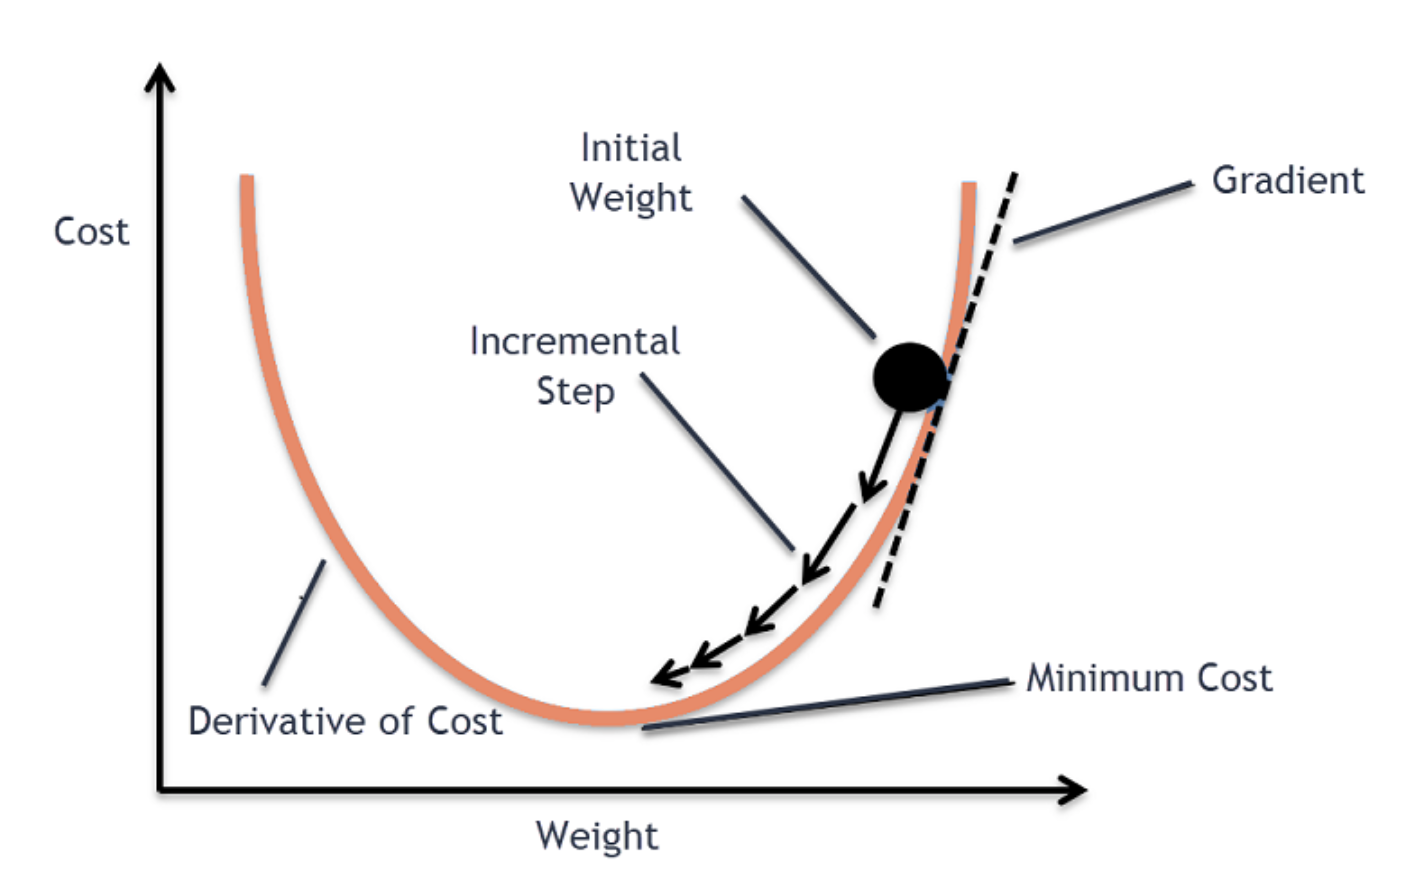
(Source: https://medium.com/@divakar_239/stochastic-vs-batch-gradient-descent-8820568eada1)

During training, the current neural network weight and bias values, along with the training data input values, determine the computed output values. The training data has known, correct target output values. The computed output values might be greater than or less than the target values.

It's possible to compute a gradient for each weight and bias. 

    - The sign of the gradient (positive or negative) tells you whether to increase or decrease the value of 
    the associated weight or bias so that the computed output values will get closer to the target output 
    values. 
    
    - The magnitude of the gradient gives you a hint about how much the weight or bias value should change.
    
So, the idea is to pass the training set through the hidden layers of the neural network and then update the parameters of the layers by computing the gradients using the training samples from the training dataset.

    - One cycle through the entire training dataset is called a training epoch.

Note: technically, the values just described as "gradients" are really "partial derivatives." The collection of all partial derivatives, one for each weight and bias, is the gradient. However, it's common to refer to an individual partial derivative as a gradient.


*Methods of Gradient Descent*

Batch Gradient Descent:
    
    - All the training data is taken into consideration to take a single step. 
        
        - Take the average of the gradients of all the training examples and then use that mean gradient to 
        update our parameters
        
        - Considering all the examples for every step of Gradient Descent (i.e., one step of gradient descent 
        in one epoch)

    - Great for convex or relatively smooth error manifolds.
    
    - Inefficient for large data sets
    
    - Converges directly to minima
    
Stochastic Gradient Descent:

    - Consider just one example at a time to take a single step. 
        
        - We do the following steps in one epoch for Stochastic Gradient Descent:
            
            1. Take an example
            
            2. Feed it to Neural Network
            
            3. Calculate it’s gradient
            
            4. Use the gradient we calculated in step 3 to update the weights
            
            5. Repeat steps 1–4 for all the examples in training dataset

    - Since we are considering just one example at a time the cost will fluctuate over the training examples 
    and it will not necessarily decrease. But in the long run, you will see the cost decreasing with 
    fluctuations.
    
    - Converges faster for large data sets
    
    - Slower calculations
    
Mini-Batch Gradient Descent:

    - Use a batch of a fixed number of training examples which is less than the actual dataset and call it a 
    mini-batch.
    
    - Updates our parameters frequently
    
    - Can use vectorized implementation for faster computations.
    
**Mini-Batch Gradient Descent**

Instead of using all training data items to compute gradients (as in batch training) or using a single training item to compute gradients (as in stochastic training), mini-batch training uses a user-specified number of training items.

Overview:

    Create the mini-batches of fixed size

    Then, do the following steps in one epoch:
    
        1. Pick a mini-batch
    
        2. Feed it to Neural Network
    
        3. Calculate the mean gradient of the mini-batch
    
        4. Use the mean gradient we calculated in step 3 to update the weights
    
        5. Repeat steps 1–4 for the mini-batches we created

Just like stochastic gradient descent, the average cost over the epochs in mini-batch gradient descent fluctuates because we are averaging a small number of examples at a time.

### Gradient Descent Weight-Update Rule

$$ w_{ji} \leftarrow w_{ji} + \Delta w_{ji}$$

where

$\Delta w_{ji}$$ = \eta \delta_{j}x_{ji}$

Updates each weight in proportion to the learning rate $\eta$, the input value $x_{ji}$ to which the weight is applied, and the error in the output of the unit.

The exact form of $\delta_{j}$ follows from the derivation of the weight-tuning rule.

   Remember, $\delta_{j}$ is computed for each network output unit *k*
    
   Thus, $\delta_{j} = (t_{k} - o_{k}) * o_{k}(1 - 0_{k})$
        
   Where, $o_{k}(1 - 0_{k})$ is the derivative of the sigmoid function.

The $\delta_{h}$ value for each hidden unit *h* has a similar form. However, since training examples provide target values $t_{k}$ only for network outputs, no target values are directly available to indicate the error of hidden units' values.

Instead, the error term for hidden unit *h* is calculated by summing the error terms $\delta_{k}$ for each output unit influenced by *h*, weighting each of the $\delta_{k}$ 's by $w_{kh}$, the weight from hidden unit *h* to output unit *k*.
    
This weight characterizes the degree to which hidden unit *h* is "responsible for" the error in output unit *k*
        
The algorithm updates weights incrementally, following the presentation of each training example. This corresponds to a stochastic approximation to gradient descent.

## Softmax

The Softmax function can be defined as below, where *c* is equal to the number of classes:

$$a_{i} = \frac{e^{z_{i}}}{\sum_{k=1}^{c} e^{z_{k}}}$$

Where $\sum_{k=1}^{c} a_{i} = 1$

In [8]:
# Implementation of Feedforward Network

'''''
After node/neuron activation (i.e., weighted sum of inputs), we must transfer the neuron to see what the 
actual output is. For node/neuron transfer, we use the Sigmoid Activation Function. The Sigmoid Activation 
Function is chosen because:
1. Introduces non-linearity. The output is a non-linear function of its input.
2. The function maps from an unbounded space to the [0; 1] interval. When training a classifer, the output 
must be interpreted as binary. The output of the sigmoid function can be interpreted as the probability of 
a positive prediction. This is better than a strictly binary label because the interpretation is naturally 
probablistic.
3. Its derivative (slope) is easily expressed in terms of its output, which we'll need for backpropagating 
error.
The output of the sigmoid function can be interpreted as the probability of a positive prediction.
'''''

def sigmoid ( x ): # Sigmoid function
    return 1 / (1 + np.exp ( -x ) )

'''''
The Sigmoid activation function normally used for binary classification needs to be changed for 
multi-class classification. Softmax distributes the probability of different classes so that they 
sum to 1. Binary classification uses only one Sigmoid hidden unit, now the number of Softmax 
hidden units needs to be same as the number of classes. 
'''''

def softmax ( target_vector ): # Numerically stable softmax function
    target_vector = target_vector - np.max ( target_vector, axis = 1 ).reshape ( -1, 1 )
    return np.exp ( target_vector ) / np.sum ( np.exp ( target_vector ), axis = 1 ).reshape ( -1, 1 )


'''''
Class: FeedForwardNetwork
    - Contains the mechanism to train a feed-forward neural network.

Functions:
    - __init__: Initializes the FeedForwardNetwork class.
    - fit: Fits the network to a set of inputs.
    - __call__: Forward pass applied the units to the inputs.
    - get_delta_list: Obtains the deltas for all the layers.
    - get_gradient_updates: Makes the gradient updates. Happens in place.
    - predict_probability: Obtains the raw output of the multi-net.
    - predict: Obtains the predicted class labels.
'''''

class FeedForwardNetwork:

    def __init__( self, * modules, learning_rate, convergence_tol, n_iterations, batch_size ):
        """
        Method which initializes the FeedForwardNetwork algorithm.
            Parameters:
                *modules: An arbitrary number of network units composed of a linear transformation and 
                    a sigmoid activation. Type: LinearSigmoid object.
                learning_rate: ETA for gradient descent. Type: float.
                convergence_tol: Training will stop if the change in loss drops below this number. Type: float.
                n_iterations: The maximum number of training interations. Type: Integer.
                batch_size: The number of examples used to calculate the gradient at each step. Type: Integer.
        """
        # Initializing Network:
        # Nodes/Neurons: Each requires an index, weight of input, weight of bias
        # Layers: Input (training data), Hidden, Output (one node for each class value)
        
        # Mini-Batch Gradient Descent: Batch size determines # of training inputs fed to neural network
        # output values are computed & compared to the target values. 
        # Then gradients are computed for each weight, bias &  accumulated.
        # When the number of processed training items reaches the batch size, all weights & biases are updated 
        # using the accumulated gradients 
        
        self.batch_size = batch_size
        self.convergence_tol = convergence_tol
        self.n_iterations = n_iterations
        self.lr = learning_rate
        self.modules = list ( modules )
        # End __init__

    def fit ( self, feature_matrix, target_vector):
        """
        Method which fits the network to a set of inputs.
            Parameters:
                feature_matrix: The feature matrix, "X". Type: Array (np.ndarray)
                target_vector: The target vector, "y". Type: Array (np.ndarray)
        """
        self.loss = [] # Classification error

        # Reshape y if needed (for compatibility with other tools)
        if len ( target_vector.shape ) == 1:
            target_vector = target_vector.reshape ( -1, 1 )
            # End if length of y == 1, reshape

        n_iterations = 0
        # While stopping criteria unmet...
        while n_iterations < 10 or (
            self.convergence_tol < np.mean ( np.abs ( np.diff ( self.loss [ -100: ] ) ) )
            and n_iterations < self.n_iterations
        ):
            n_iterations += 1
            # Get a random batch
            batch_mask = np.random.choice (
                np.arange ( feature_matrix.shape [ 0 ] ), replace = True, size = self.batch_size
            )

            # Make predictions over the batch
            preds = self ( feature_matrix [ batch_mask ] )

            # Calculate the delta
            delta_list = self.get_delta_list ( target = target_vector [ batch_mask ] )

            # Make the gradient updates
            gradient_list = self.get_gradient_updates ( delta_list = delta_list )

            # Calculate and track the loss
            # Loss function: Out of sample classification error (mean squared error)
            loss = np.mean ( ( target_vector [ batch_mask ] - preds ) ** 2 )
            self.loss.append ( loss )
            
            # End while stopping critera unmet
        # End fit()

    def __call__ ( self, feature_matrix ):
        """
        Forward pass applied the units to the inputs.
            Parameters:
                feature_matrix: Indicates the feature matrix of inputs, "X". Type: Array (np.ndarray).
        """
        return pipe ( feature_matrix, * tuple ( self.modules ) )

    def get_delta_list ( self, target ):
        """
        Method which obtains the deltas for all the layers
            Parameters:
                target: Indicates class labels, which are onehot encoded. Type: Array (np.ndarray).
            Returns: List of deltas for all layers
        """
        delta_list = []

        # Iterate through the units
        for module_number in range ( len ( self.modules ) - 1, -1, -1 ):
            # Get the most recent output of the module
            module_output = self.modules [ module_number ].get_previous_output()

            # If it's the last layer in the network
            # get the output layer delta value
            if module_number == len ( self.modules ) - 1:
                delta_list.append (
                    self.modules [ module_number ].get_last_layer_gradient (
                        target = target, output = softmax ( module_output )
                    ) # End append delta list
                ) # End if last layer in network

            # If it's not the last unit...
            else:
                # Get the delta value for the unit
                delta_list.insert (
                    0,
                    self.modules [ module_number ].gradient_update (
                        gradient_accumulated = delta_list [ 0 ],
                        previous_weights = self.modules [ module_number + 1 ].weight,
                    )[:, 1:],
                ) # End else not last layer
        return delta_list
        # End get_delta_list()

    def get_gradient_updates ( self, delta_list ):
        """
        Method which makes the gradient updates. Happens in place.
            Parameters:
                delta_list: The list of deltas calculated above. Type: list.
        """
        # Iterate through the modules
        for module_number in range ( len ( self.modules ) - 1, -1, -1 ):
            # Get the previous input of the unit
            previous_input = self.modules [ module_number ].previous_input

            # If the unit has a bias, add a column of ones
            if self.modules [ module_number ].bias:
                previous_input = np.concatenate (
                    [ np.ones ( ( previous_input.shape [ 0 ], 1 ) ), previous_input ], axis = 1
                ) # End if unit has bias, add column of ones

            # Calculate the gradient from delta and the previous input
            gradient = previous_input.T @ delta_list [ module_number ]

            # Make the update to the weights
            self.modules [ module_number ].weight += self.lr * gradient
            # End module iterations
        # End get_gradient_updates()

    def predict_probability ( self, feature_matrix ):
        """
        Method which obtains the raw output of the multi-net
            Parameters:
                feature_matrix: The feature matrix, "X", to make predictions over. Type: Array (np.ndarray).
        """
        return self ( feature_matrix )
        # End predict_probability()

    def predict ( self, feature_matrix ):
        """
        Method which obtains the predicted class labels.
            Parameters:
                feature_matrix: The feature matrix, "X", to make predictions over. Type: Array (np.ndarray).
        """
        
        # Forward-propagate an input pattern to get an output; use the output values themselves directly 
        # as the probability of a belonging to each output class (i.e., class prediction).
        # Done by selecting the class value with the larger probability (the arg max function).      
        predicted_probabilities = self.predict_probability ( feature_matrix )

        # Get the largest output value as the label
        return np.argmax ( predicted_probabilities, axis = 1 )
        # End predict()
    # End class FeedForwardNetwork

'''''
Class: LinearSigmoid
    - Contains the basic unit of the feedforward network.

Functions:
    - __init__: Initializes the LinearSigmoid class.
    - __call__: Makes a forward pass through the network.
    - gradient_update: Method which obtains the non-last layer gradient update values.
    - get_last_layer_gradient: Obtains the delta value for the last unit in the network.
    - get_previous_output: Helper to get the output given the previous input
'''''
class LinearSigmoid:

    def __init__ ( self, in_features, out_features, bias = True ):
        """
        Method which initializes the LinearSigmoid class.
            Parameters:
                in_features: The number of features as inputs. Type: Integer
                out_features: The number of features as outputs. Type: Integer
                bias: If true, a bias column of ones will be added. Type: Boolean
        """
        # Initializing Network:
        # Nodes/Neurons: Each requires an index, weight of input, weight of bias
        # Layers: Input (training data), Hidden, Output (one node for each class value)
        
        # 3 Parameters needed to initialize a network:
        # 1. Number of inputs
        # 2. Number of outputs
        # 3. Number of hidden layers
        self.in_features = in_features # Number of inputs
        self.out_features = out_features # Number of outputs

        # Initialize Network (Nodes/Neurons): Assign weight of input
        # Initialize random weights
        self.weight = np.random.uniform (
            low = -0.01,
            high = 0.01,
            size = ( in_features + 1 if bias else in_features, out_features ),
        )
        
        # Initialize Network (Nodes/Neurons): Assign weight of bias
        self.bias = bias
        # End __init__

    def __call__( self, feature_matrix ):
        """
        Method which makes a forward pass through the network.
            Parameters:
                feature_matrix: The feature matrix, "X". Type: Array (np.ndarray)
        """
        # Keep track of what went in, so we can calculate the delta
        self.previous_input = feature_matrix

        if self.bias:
            # Add column of ones if creating bias unit
            feature_matrix = np.concatenate ( [ np.ones ( ( feature_matrix.shape [ 0 ], 1 ) ), feature_matrix ], axis = 1 )

        # Forward Propagate: Calculate the output for each neuron
        # Use Sigmoid Activation Function: 1 / (1 + np.exp ( -x ) )
        return sigmoid ( feature_matrix @ self.weight )
        # End __call__

    def gradient_update ( self, gradient_accumulated, previous_weights ):
        """
        Method which obtains the non-last layer gradient update values.
            Parameters:
                gradient_accumulated: Delta of the downstream unit. Type: Array (np.ndarray)
                previous_weights: Weights of the downstream unit. Type: Array (np.ndarray)
        """
        # Get previous output
        previous_output = self ( self.previous_input )

        # Add ones if bias
        if self.bias:
            previous_output = np.concatenate (
                [ np.ones ( ( previous_output.shape [ 0 ], 1 ) ), previous_output ], axis = 1
            ) # End if bias, add column of ones

        # Transfer Derivative: 
        # We are using the sigmoid transfer function, the derivative of which can be calculated as follows:
        # derivative = output * (1.0 - output)
        # Error Backpropagation: Calculate the error for each output neuron, calculated as follows:
        # error = (predicted - output) * transfer_derivative(output)
        # The back-propagated error signal is accumulated & then used to determine the error for the neuron 
        # in the hidden layer, as follows:
        # error = (weight_k * error_j) * transfer_derivative(output)

        # Get O (1 - O) * delta @ W_i +1
        return ( previous_output * ( 1 - previous_output ) ) * np.dot (
            gradient_accumulated, previous_weights.T
        )
        # End gradient_update()

    def get_last_layer_gradient ( self, output, target ):
        """
        Method which obtains the delta value for the last unit in the network.
            Parameters:
                output: Matrix of outputs from multi-net. Type: Array (np.ndarray)
                target: Matrix of one-hot encoded class labels. Type: Array (np.ndarray)
        """
        # (O - Y) O (1 - O)
        return -2 * ( output - target ) * output * ( 1 - output )
        # End get_last_layer_gradient()

    def get_previous_output ( self ):
        """
        Helper to get the output given the previous input
        """
        return self ( self.previous_input )
        # End get_previous_output()
    # End class LinearSigmoid

'''''
Class: Standardizer
    - Class which normalizes data.

Functions:
    - __init__: Initializes the Standardizer 
    - fit: Calculates columnwise mean and standard deviation
    - transform: Applies the columnwise mean and std transformations
    - fit_transform: Fits on the columns and then transforms X
'''''


class Standardizer:
    def __init__ ( self, mean = True, std = True ):
        # Initialize parameters
        # Class instances
        self.mean = mean
        self.std = std
        # End __init__

    def fit ( self, feature_matrix ):
        """
        Method which calculates the columnwise mean and standard deviation
            Parameters:
                feature_matrix: Indicates the feature matrix, "X", to make predictions for. Type: Array (np.ndarray)
        """
        if self.mean:
            self.df_means = feature_matrix.mean ( axis = 0 ) # Get the colwise means
            # End if mean
        if self.std:
            self.df_std = feature_matrix.std ( axis = 0 ) # Get the colwise stds
            # End if std
        # End fit()

    def transform ( self, feature_matrix ):
        """
        Applies the columnwise mean and std transformations
            Parameters:
                feature_matrix: Indicates the feature matrix, "X", to make predictions for. Type: Array (np.ndarray)
            Returns: df_xf a dataframe of transformed x's
        """
        if not self.mean and not self.std:
            return feature_matrix
            # End if no mean or std
        if self.mean:
            df_xf = feature_matrix - self.df_means # Subtract means
            # End if mean
        if self.std:
            non_zero = np.bitwise_not ( np.isclose ( self.df_std, 0 ) )
            df_xf = np.where ( non_zero, df_xf / self.df_std, df_xf )
            # End if stf

        return df_xf
        # End transform()

    def fit_transform ( self, feature_matrix ):
        """
        Fits on the columns and then transforms X
            Parameters:
                feature_matrix: Indicates the feature matrix, "X", to make predictions for. Type: Array (np.ndarray)
        """
        self.fit ( feature_matrix )
        return self.transform ( feature_matrix )
        # End fit_transform()

# Model Evaluation

Loss functions are used by algorithms to learn the classification models from the data.

Classification metrics, however, evaluate the classification models themselves. 

For a binary classification task, where "1" is taken to mean "positive" or "in the class" and "0" is taken to be "negative" or "not in the class", the cases are:

1. The true class can be "1" and the model can predict "1". This is a *true positive* or TP.
2. The true class can be "1" and the model can predict "0". This is a *false negative* or FN.
3. The true class can be "0" and the model can predict "1". This is a *false positive* or FP.
4. The true class can be "0" and the model can predict "0". This is a *true negative* or TN.


## Training Learners with Cross-Validation

Fundamental assumption of machine learning:The data that you train your model on must come from the same distribution as the data you hope to apply the model to.

Cross validation is the process of training learners using one set of data and testing it using a different set.

Options:
    - Divide your data into two sets:
        1. The training set which you use to build the model
        2. The test(ing) set which you use to evaluate the model. 
    - kfolds: Yields multiple estimates of evaluation metric

    
### k-fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups (or folds) that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation.


The general procedure is as follows:
- Shuffle the dataset randomly.
- Split the dataset into k groups (or folds)
- Save first fold as the validation set & fit the method on the remaining k-1 folds
- For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
- Fit a model on the training set and evaluate it on the test set
- Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores
    - The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

Below is the visualization of a k-fold validation when k=10.

Looks like:

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **Test** | Train | Train | Train | Train | Train | Train | Train | Train | Train |

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| **Test** | Train | Train | Train | Train | Train | Train | Train | Train |

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| Train | **Test** | Train | Train | Train | Train | Train | Train | Train |

And finally:

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| Train | Train | Train | Train | Train | Train | Train | Train | **Test** |

### Stratified k-fold Cross-Validation
Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.

For classification problems, one typically uses stratified k-fold cross-validation, in which the folds are selected so that each fold contains roughly the same proportions of class labels.


In [9]:
# Model Evaluation

# Teaching Learners with Cross-Validation
# k-Folds

'''''
Class: KFoldCV
    - Class to handle K-fold Cross-Validation

Functions:
    - __init__: Initializes the EditedKNN algorithm. 
    - get_indices: Obtains indices of length of rows in feature matrix, "X".
    - get_one_split: Given the split indices, obtains one of the splits.
    - get_indices_split: Splits the indices by the number of folds.
    - split: Creates a generator of train test splits from the feature matrix, "X".
'''''

class KFoldCV:
    
    def __init__( self, number_of_folds: int, shuffle: bool = True ):
        """
        Initializes class KFold CV.
            Parameters
                number_of_folds: Indicates the number of folds or splits. Type: Integer
                shuffle: If True, rows will be shuffled before the split. Type: Boolean
        """
        # Initialize parameters
        # Class instances
        self.number_of_folds = number_of_folds
        self.shuffle = shuffle

    def get_indices ( self, feature_matrix ): 
        """
        Method obtains indices of length of rows in feature matrix, "X".
            Parameters
                feature_matrix: Indicates the matrix to make predictions for. Type: Array (np.ndarray)
            Returns: Shuffled K-Fold Indices matrix (arranged by row).
        """
       
        # Shuffle if `self.shuffle` is true.
        nrows = feature_matrix.shape [ 0 ]
        return (
            np.random.permutation (
                np.arange ( nrows )
            )  # Shuffle the rows if `self.shuffle`
            if self.shuffle
            else np.arange ( nrows )
        ) # End get_indices()

    @staticmethod
    def _get_one_split ( split_indices, number_of_split ):
        """
        Given the split indices, function obtains one of the training splits. Specifically, 
        obtains the variable 'number_of_split' element of the indices.
            Parameters
                number_of_folds: Indicates the number of folds or splits. Type: Integer.
                split_indices: Indicates array of indices in the training split. Type: Integer.
            Returns: number_of_split. Given the split index, obtains the number of split elememnts.
        """
    
        # Given the split indices, get the `number_of_split` element of the indices.
        return (
            np.setdiff1d ( np.concatenate ( split_indices ), split_indices [ number_of_split ] ),
            split_indices [ number_of_split ],
        ) # Gets the train
        # End get_one_split

    @staticmethod
    def _get_indices_split ( indices, number_of_folds ):
    
        """
        Function splits the indices by the number of folds.
            Parameters
                indices: Indicates the index of the training/spilt data Type: Integer.
                number_of_folds: Indicates the number of folds or splits. Type: Integer.
            Returns: array split by indices
        """
        # Split the indicies by the number of folds
        return np.array_split ( indices, indices_or_sections = number_of_folds )
        # End get_indices_split()

    def split ( self, feature_matrix: np.ndarray, target_vector: np.ndarray = None ):
        """
        Method which creates a generator of train/test splits from feature matrix, "X".
            Parameters
                feature_matrix: Indicates the feature matrix, "X", to make predictions for. Type: Array (np.ndarray)
                target_vector: Indicates the target vector, "y". Type: Array (np.ndarray).
            Returns: All but one split as train data (Type: Array) and one split as test data (Type: Array).
        """
        # Split the indices into `number_of_folds` subarray
        indices = self.get_indices ( feature_matrix )
        split_indices = KFoldCV._get_indices_split ( indices = indices, number_of_folds = self.number_of_folds )
        for number_of_split in range ( self.number_of_folds ):
            # Return all but one split as train, and one split as test
            yield KFoldCV._get_one_split ( split_indices, number_of_split = number_of_split )
        # End split()
    # End class KFoldCV
            
'''''
Class: KFoldStratifiedCV
    - Class to conduct Stratified K-Fold Cross Validation. Ensures the splitting of data into folds is governed by 
    criteria such as ensuring that each fold has the same proportion of observations with a given categorical 
    value, such as the class outcome value.

Functions:
    - __init__: Initializes the KFoldStratifiedCV algorithm 
    - add_split_col: Adds new column called "split"
    - split: Takes an array of classes, and creates train/test splits with proportional examples for each group.
'''''

class KFoldStratifiedCV:
    """
    Class to conduct Stratified K-Fold Cross Validation.
        Parameters
            number_of_folds: Indicates the number of folds or splits. Type: Integer
            
    """

    def __init__( self, number_of_folds, shuffle = True ):
        # Initialize parameters
        # Class Instances
        self.number_of_folds = number_of_folds
        self.shuffle = shuffle

    def add_split_col ( self, feature_array ):
        """
        Function adds new column called "split"
            Parameters
                feature_array: Indicates the feature array
            Returns: New column in dataframe with index & split 
        """
        feature_array = feature_array if not self.shuffle else np.random.permutation ( feature_array )
        n = len ( feature_array )
        k = int ( np.ceil ( n / self.number_of_folds ) )
        return pd.DataFrame (
            { "idx": feature_array, "split": np.tile ( np.arange ( self.number_of_folds ), k )[ 0 : n ] , }
        )
        # End add_split_col

    def split ( self, target_vector, feature_matrix = None ):
        """
        Function takes an array of classes, and creates train/test splits with proportional examples for each group.
            Parameters
                target_vector: Indicates the array of class labels. Type: Array (np.array)
            Returns: Dataframe with index values of not cv split & cv split train and test data
        """
        # Make sure y is an array
        target_vector = np.array ( target_vector ) if isinstance ( target_vector, list ) else target_vector

        # Groupby y and add integer indices.
        df_with_split = (
            pd.DataFrame ( { "y": target_vector, "idx": np.arange ( len ( target_vector ) ) } )
            .groupby ( "y" ) [ "idx" ]
            .apply ( self.add_split_col )  # Add column for split for instance
        )

        # For each fold, get train and test indices (based on column for split)
        for cv_split in np.arange ( self.number_of_folds - 1, - 1, - 1 ):
            train_bool = df_with_split [ "split" ] != cv_split
            test_bool = ~ train_bool
            # Yield index values of not cv_split and cv_split for train, test
            yield df_with_split [ "idx" ].values [ train_bool.values ], df_with_split [
                "idx"
            ].values [ test_bool.values ]
        # End split()                
# End class KFoldStratifiedCV

## Parameter Tuning

Parameter tuning is the process to selecting the values for a model’s parameters that maximize the accuracy of the model.


A machine learning model has two types of parameters:

    1. Parameters learned through a machine learning model
    
    2. Hyper-parameters passed to the machine learning model


In KNN algorithm, the hyper-parameter is the specified value of k. 

Normally we randomly set the value for these hyper parameters and see what parameters result in best performance. However randomly selecting the parameters for the algorithm can be exhaustive.


## Grid Search

Instead of randomly selecting the values of the parameters, GridSearch automatically finds the best parameters for a particular model. Grid Search is one such algorithm.

Grid Search evaluates all the combinations from a list of desired hyper-parameters and reports which combination has the best accuracy.

### Process

Step 1: Set your hyper-parameters ("param_grid" here).

Step 2: Fit the model. Use k-fold cross-validation internally on selected hyper-parameters. Store model average & accuracy.

Step 3: Go back to step 1 changing at least 1 hyper-parameter

Step 4: Select hyperparameter which gives best performance (highest accuracy)

Note that the search is not done within each fold. Instead, cross-validation is used to evaluate the performance of the model with the current combination of hyperparameters.

In [10]:
# Model Evaluation
# Parameter Tuning with Grid Search
            

'''''
Class: GridSearchCV
    - Grid Search evaluates all the combinations from a list of desired hyper-parameters and reports 
    which combination has the best accuracy.

Functions:
    - __init__: Initializes the GridSearchCV algorithm 
    - create_param_grid: Creates a mapping of arguments to values to grid search over.
    - get_single_fitting_iteration: Runs a model fit and validation step.
    - get_cv_scores: Runs the grid search across the parameter grid.
'''''

class GridSearchCV:

    def __init__(
        # Initialize parameters
        self,
        model_callable: Callable, # Generates model object; takes keys of param_grid as arguments
        param_grid: Dict, # Mapped arguments to potential values
        scoring_func: Callable, # Score to be maximized
        cv_object: Union [ KFoldCV, KFoldStratifiedCV ],
    ):
        """
        Class to assist with grid searching over potential parameter values.
            Parameters:
                model_callable: Function that generates a model object. Should take the keys of param_grid as arguments. Type: Callable
                param_grid: Mapping of arguments to potential values. Type: Dictionary
                scoring_func: Takes in y and yhat and returns a score to be maximized. Type: Callable
                cv_object: A CV object that will be used to make validation splits.
        """
        # Class instances
        self.model_callable = model_callable
        self.param_grid = param_grid
        self.scoring_func = scoring_func
        self.cv_object = cv_object

    @staticmethod
    def create_param_grid ( param_grid: Dict ):
        """
        Function creates a mapping of arguments to values to grid search over.
            Parameters:
                param_grid: Dictionary of key:value map (arguments to potential values). Type: Dictionary {kwarg: [values]}
        """
        return (
            dict ( zip ( param_grid.keys(), instance ) )
            for instance in product ( * param_grid.values() )
        ) # End create_param_grid

    def get_single_fitting_iteration ( self, feature_matrix: np.ndarray, target_vector: np.ndarray, model ):
        """
        Function runs a model fit and a validation step.
            Parameters:
                feature_matrix: Indicates the feature matrix for training. Type: Array (np.ndarray).
                target_vector: Indicates the arget vector for training. Type: Array (np.ndarray).
                model: Indicates model object with a fit and predict method.
            Returns: mean score
        """
        scores = []
        # Create train/test splits
        for train, test in self.cv_object.split ( feature_matrix = feature_matrix, target_vector = target_vector ):
            # Fit the model
            model.fit ( feature_matrix [ train ], target_vector [ train ] )
            # Get the predictions
            yhat = model.predict ( feature_matrix [ test ] )
            # Get the scores
            scores.append ( self.scoring_func ( target_vector [ test ], yhat ) )
        # Get the average score.
        return np.mean ( scores )
    # End get_single_fitting_iteration()

    def get_cv_scores ( self, feature_matrix: np.ndarray, target_vector: np.ndarray ):
        """
        Function runs the grid search across the parameter grid.
            Parameters:
                feature_matrix: Indicates the feature matrix. Type: Array (np.ndarray).
                target_vector: Indicates the target vector. Type: Array (np.ndarray).
        """
        # Create the parameter grid
        param_grid = list ( GridSearchCV.create_param_grid ( self.param_grid ) )

        # Zip the grid to the results from a single fit
        return zip (
            param_grid,
            [
                self.get_single_fitting_iteration (
                    feature_matrix, target_vector, model = self.model_callable ( ** param_set )
                )
                for param_set in param_grid
            ],
        ) # End get_cv_scores
    # End class GridSearchCV

In [11]:
"""
Experiment Code: Includes scoring function (argmax), Feed-Forward Neural Net Classification using Backpropagation
"""


def score_func ( target_vector, yhat ):
    return np.mean ( np.argmax ( target_vector, axis = 1 ) == yhat )

def run_classification_experiment (
    feature_matrix,
    target_vector,
    learning_rate_choices = np.linspace ( 0.001, 0.01, 10 ),
    hidden_layer_choices = list ( range ( 3, 16, 3 ) ),
    n_iterations = 10000,
    conv_tol = 0.001,
    filename = None,
):
    kfold = KFoldStratifiedCV ( number_of_folds = 5 )
    accuracy_0h = [] # Accuracy of 0 hidden layers
    accuracy_1h = [] # Accuracy of 1 hidden layer
    accuracy_2h = [] # Accuracy of 2 hidden layers
    baseline = []

    split = 0
    for train, test in kfold.split ( feature_matrix = feature_matrix, target_vector = target_vector.reshape ( -1, ) ):
        split += 1
        logger.info ( f"CV Iteration: { split }" )
        logger.info ( "Standardizing data" )
        max_scaler = Standardizer() # Mean center & scale by std
        X_train = max_scaler.fit_transform ( feature_matrix [ train ] )
        X_test = max_scaler.transform ( feature_matrix [ test ] )
        y_train = pd.get_dummies ( target_vector [ train ] ).values

        # Output classifications for one fold each
        if split == 1:
            logger.info ( "Finding learning rate for H0" )
            # 0 Hidden Layers; no bias
            # Initialize Feed-Forward Network
            # Define 3 network parameters (layers): 1. # inputs, 2. # hidden layers 3. # output
            # Use mini-batch gradient descent to minimize the loss function of the network
            # Define mini-batch size
            # Loss Function = Mean squared error
            h0_callable = lambda lr: FeedForwardNetwork (
                LinearSigmoid (
                    in_features = X_train.shape [ 1 ], out_features = y_train.shape [ 1 ]
                ),
                convergence_tol = conv_tol,
                n_iterations = n_iterations,
                learning_rate = lr,
                batch_size = 48,
            )
            
            # Use GridSearchCV (uses a validation set) to tune learning rate
            results = list (
                GridSearchCV (
                    model_callable = h0_callable,
                    param_grid = { "lr": learning_rate_choices },
                    scoring_func = score_func,
                    cv_object = KFoldCV ( number_of_folds = 3 ),
                ).get_cv_scores ( feature_matrix = X_train, target_vector = y_train )
            )
            
            # Tune learning rate chosen based on which set minimized the out-of-sample classifcation error
            best_model_h0 = h0_callable (
                ** sorted ( results, key = lambda x: x [ -1 ], reverse = True )[ 0 ] [ 0 ]
            )
            
            # Log Results for 0 Hidden Layers
            logger.info (
                f"Results: { sorted ( results, key = lambda x: x[ -1 ], reverse = True )[ 0 ][ 0 ] }"
            )

            # 1 Hidden Layer
            logger.info ( "Finding topology and learning rate for H1" )
            # Initialize Feed-Forward Network
            # Define 3 network parameters (layers): 1. # inputs, 2. # hidden layers 3. # output
            # Each node/neuron requires weight of input, weight of bias, index
            # Use mini-batch gradient descent to minimize the loss function of the network
            # Define mini-batch size
            # Loss Function = Classification Error
            h1_callable = lambda h1, lr: FeedForwardNetwork (
                LinearSigmoid ( in_features = X_train.shape [ 1 ], out_features = h1, bias = True ),
                LinearSigmoid ( in_features = h1, out_features = y_train.shape[ 1 ], bias = True ),
                convergence_tol = conv_tol,
                n_iterations = n_iterations,
                learning_rate = lr,
                batch_size = X_train.shape [ 1 ],
            )

            # Use GridSearchCV (uses a validation set) to tune learning rate & # of hidden layers
            results = list (
                GridSearchCV (
                    model_callable = h1_callable,
                    param_grid = {
                        "h1": hidden_layer_choices,
                        "lr": learning_rate_choices,
                    },
                    scoring_func = score_func,
                    cv_object = KFoldCV ( number_of_folds = 3 ),
                ).get_cv_scores ( feature_matrix = X_train, target_vector = y_train )
            )
            
            # Tune # of hidden layers & learning rate chosen based on which set minimized 
            # the out-of-sample classification error
            best_model_h1 = h1_callable (
                ** sorted ( results, key = lambda x: x [ -1 ], reverse = True )[ 0 ][ 0 ]
            )
            
            # Log results for 1 hidden layer
            logger.info (
                f"Results: { sorted ( results, key = lambda x: x [ -1 ], reverse = True )[ 0 ] [ 0 ] }"
            )

            # 2 Hidden Layers
            logger.info ( "Finding topology and learning rate for H2" )
            # Initialize Feed-Forward Network
            # Define 3 network parameters (layers): 1. # inputs, 2. # hidden layers 3. # output
            # Each node/neuron requires weight of input, weight of bias, index
            # Use mini-batch gradient descent to minimize the loss function of the network
            # Define mini-batch size
            # Loss Function = Classification Error
            h2_callable = lambda h1, h2, lr: FeedForwardNetwork (
                LinearSigmoid ( in_features = X_train.shape [ 1 ], out_features = h1, bias = True ),
                LinearSigmoid ( in_features = h1, out_features = h2, bias = True ),
                LinearSigmoid ( in_features = h2, out_features = y_train.shape [ 1 ], bias = True ),
                convergence_tol = conv_tol,
                n_iterations = n_iterations,
                learning_rate = lr,
                batch_size = X_train.shape [ 1 ],
            )

            # Use GridSearchCV (uses a validation set) to tune learning rate & # of hidden layers
            results = list (
                GridSearchCV (
                    model_callable = h2_callable,
                    param_grid = {
                        "h1": hidden_layer_choices,
                        "h2": hidden_layer_choices,
                        "lr": learning_rate_choices,
                    },
                    scoring_func = score_func,
                    cv_object = KFoldCV ( number_of_folds = 3 ),
                ).get_cv_scores ( feature_matrix = X_train, target_vector = y_train )
            )
            
            # Log results for 1 hidden layer
            logger.info (
                f"Results: { sorted ( results, key = lambda x: x [ -1 ], reverse = True )[ 0 ][ 0 ] }"
            )
            
            # Tune # of hidden layers & learning rate chosen based on which set minimized 
            # the out-of-sample classification error
            best_model_h2 = h2_callable (
                ** sorted ( results, key = lambda x: x [ -1 ], reverse = True ) [ 0 ] [ 0 ]
            )
        
        # Train the Network
        # Fit the tuned/best models to training data
        best_model_h0.fit ( X_train, y_train )
        best_model_h1.fit ( X_train, y_train )
        best_model_h2.fit ( X_train, y_train )

        # Make Predictions Using Trained Network
        if split == 1 and filename:
            # Log Predictions to output file
            logger.info ( f"Creating prediction output files: { filename }" )
            preds = pd.DataFrame (
                np.hstack (
                    [
                        X_test,
                        target_vector [ test ].reshape ( -1, 1 ),
                        np.array ( best_model_h0.predict ( X_test ) ).reshape ( -1, 1 ),
                        np.array ( best_model_h1.predict ( X_test ) ).reshape ( -1, 1 ),
                        np.array ( best_model_h2.predict ( X_test ) ).reshape ( -1, 1 ),
                    ]
                )
            )
            orig_cols = list ( preds.columns )
            orig_cols [ -4: ] = [
                "actuals",
                "h0_prediction",
                "h1_predictions",
                "h2_predictions",
            ]
            preds.columns = orig_cols
            preds.to_csv ( filename, index = False )

        baseline.append ( np.mean ( mode ( target_vector [ train ] ).mode [ 0 ] == target_vector [ test ] ) )
        accuracy_0h.append ( np.mean ( best_model_h0.predict ( X_test ) == target_vector [ test ] ) )
        accuracy_1h.append ( np.mean ( best_model_h1.predict ( X_test) == target_vector [ test ] ) )
        accuracy_2h.append ( np.mean ( best_model_h2.predict ( X_test) == target_vector [ test ] ) )
    
    # Print to output final results
    return {
        "models": { "h0": best_model_h0, "h1": best_model_h1, "h2": best_model_h2, },
        "accuracy": {
            "h0": accuracy_0h,
            "h1": accuracy_1h,
            "h2": accuracy_2h,
            "baseline": baseline,
        },
    }

# Breast Cancer Data Set
## Extract, Transform, Load: Breast Cancer Data

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

### Attribute Information: 10 Attributes (d)

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10

### One Class Label
11. Class: (2 for benign, 4 for malignant)

In [12]:
if __name__ == "__main__":
    np.random.seed ( 8032020 ) # Today's Date

# Log ETL: Breast Cancer Data
logger.info ( "ETL: Breast Cancer Data Set" )

# Read Breast Cancer Data
cancer_data = (
    pd.read_csv(
        "breast-cancer-wisconsin.data.csv",
        header = None,
        #Assign labels to columns
        names = [
            "id_number",
            "clump_thickness",
            "uniformity_cell_size",
            "uniformity_cell_shape",
            "marginal_adhesion",
            "single_epithelial_cell_size",
            "bare_nuclei",
            "bland_chromatin",
            "normal_nucleoli",
            "mitosis",
            "class",
        ],
    )
    .replace ( "?", np.NaN ) # Remove all instances with "?"
    .dropna ( axis = 0, how = "any" ) # Delete all NaN
    .astype ( "int" ) # Assign all values as type: integer
)

INFO:__main__:ETL: Breast Cancer Data Set


In [13]:
# Confirm data was properly read by examining data frame
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id_number                      683 non-null int64
clump_thickness                683 non-null int64
uniformity_cell_size           683 non-null int64
uniformity_cell_shape          683 non-null int64
marginal_adhesion              683 non-null int64
single_epithelial_cell_size    683 non-null int64
bare_nuclei                    683 non-null int64
bland_chromatin                683 non-null int64
normal_nucleoli                683 non-null int64
mitosis                        683 non-null int64
class                          683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


**Notes** 

As expected, Dataframe shows us we have 683 total observations & 11 columns (or, 11 variables). Each variable has 683 observations, so we know we have no missing data. 

We see that all columns are integers, just as we want it

In [14]:
# Log ETL
logger.info ( f"ETL, Dataframe Info: { cancer_data.head() }" )

INFO:__main__:ETL, Dataframe Info:    id_number  clump_thickness  uniformity_cell_size  uniformity_cell_shape  \
0    1000025                5                     1                      1   
1    1002945                5                     4                      4   
2    1015425                3                     1                      1   
3    1016277                6                     8                      8   
4    1017023                4                     1                      1   

   marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   bland_chromatin  normal_nucleoli  mitosis  class  
0                3                1        1 

In [15]:
# Look at first few rows of dataframe
cancer_data.head()

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [16]:
# Verify whether any values are null
cancer_data.isnull().values.any()

False

In [17]:
# Again
cancer_data.isna().any()

id_number                      False
clump_thickness                False
uniformity_cell_size           False
uniformity_cell_shape          False
marginal_adhesion              False
single_epithelial_cell_size    False
bare_nuclei                    False
bland_chromatin                False
normal_nucleoli                False
mitosis                        False
class                          False
dtype: bool

In [18]:
# Drop id_number from cancer data set
cancer_data.drop ( [ 'id_number' ], axis = 'columns', inplace = True )
# Confirm
cancer_data.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [19]:
# Map Current class values
# Now, 2 = Nonmembership (benign); 4 = Membership (malignant)
# We want 2 = 0 and 4 = 1
cancer_data [ 'class' ]= cancer_data [ 'class' ].map ( { 2 : 0, 4 : 1 } )
# Confirm
cancer_data.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [20]:
# Classification for Class Label: data frame for this category
cancer_data[ "class" ].astype ( "category" ).cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Length: 683, dtype: int8

In [21]:
# Confirm
cancer_data.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [22]:
# One-hot encoding/Dummy Variables for remaining cancer data
cancer_data_boolean = pipe ( cancer_data,lambda df: pd.get_dummies ( data = df, columns = [ col for col in df.columns if col != "class" ],
        drop_first = True ) )
# Confirm
cancer_data_boolean.head()

,class,clump_thickness_2,clump_thickness_3,clump_thickness_4,clump_thickness_5,clump_thickness_6,clump_thickness_7,clump_thickness_8,clump_thickness_9,clump_thickness_10,...,normal_nucleoli_9,normal_nucleoli_10,mitosis_2,mitosis_3,mitosis_4,mitosis_5,mitosis_6,mitosis_7,mitosis_8,mitosis_10
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## (Brief) Exploratory Data Analysis: Breast Cancer Data

### Single Variables

Let's look at the summary statistics & Tukey's 5

In [23]:
# Log EDA: Breast Cancer Data
logger.info ( "EDA: Breast Cancer Data Set" )

INFO:__main__:EDA: Breast Cancer Data Set


In [24]:
# Descriptive Statistics
cancer_data.describe()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


**Notes**

Total number of observations: 683

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$

If we wanted, we could use this information for each attribute to calculate the following:
   - Interquartile Range: Q3-Q1
   - Whisker: 1.5 * IQR (Outliers lie beyond the whisker)

In [25]:
# Log Descriptives
logger.info ( f"Descriptive Statistics: { cancer_data.describe() }" )

INFO:__main__:Descriptive Statistics:        clump_thickness  uniformity_cell_size  uniformity_cell_shape  \
count       683.000000            683.000000             683.000000   
mean          4.442167              3.150805               3.215227   
std           2.820761              3.065145               2.988581   
min           1.000000              1.000000               1.000000   
25%           2.000000              1.000000               1.000000   
50%           4.000000              1.000000               1.000000   
75%           6.000000              5.000000               5.000000   
max          10.000000             10.000000              10.000000   

       marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
count         683.000000                   683.000000   683.000000   
mean            2.830161                     3.234261     3.544656   
std             2.864562                     2.223085     3.643857   
min             1.000000                  

## (Brief) Exploratory Data Analysis: Breast Cancer Data

### Pair-Wise: Attribute by Class

In [26]:
# Frequency of diagnoses classifications
cancer_data [ 'class' ].value_counts() # raw counts

0    444
1    239
Name: class, dtype: int64

**Notes**

Class = 0 (benign) has 444 (out of 683) instances (~65.01%)

Class = 1 (malignant) has 239 (out of 683) instances (~34.99%)

In [27]:
#Log Pair-Wise Attribute by Class
logger.info ( f"Pair-Wise Attribute by Class: { cancer_data [ 'class' ].value_counts() }" )

INFO:__main__:Pair-Wise Attribute by Class: 0    444
1    239
Name: class, dtype: int64


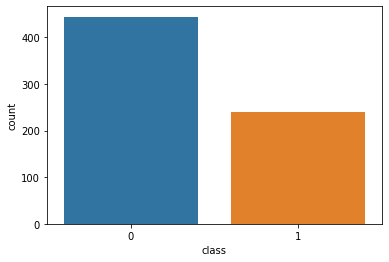

In [28]:
# Plot diagnosis frequencies
sns.countplot ( cancer_data [ 'class' ],label = "Count" ) # boxplot

In [29]:
def describe_by_category ( data, numeric, categorical, transpose = False ):
    grouped = data.groupby ( categorical )
    grouped_y = grouped [ numeric ].describe()
    if transpose:
        print( grouped_y.transpose() )
    else:
        print ( grouped_y )

In [30]:
# Descriptive Statistics: Describe each variable by class (means only)
cancer_data.groupby ( [ 'class' ] )[ 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis' ].mean()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
class,,,,,,,,,
0,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
1,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


In [31]:
# Descriptive Statistics: Describe each variable by class
cancer_data.groupby ( [ 'class' ] )[ 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis' ].describe()

clump_thickness                                                 \
                count      mean       std  min  25%  50%   75%   max   
class                                                                  
0               444.0  2.963964  1.672661  1.0  1.0  3.0   4.0   8.0   
1               239.0  7.188285  2.437907  1.0  5.0  8.0  10.0  10.0   

      uniformity_cell_size            ... normal_nucleoli       mitosis  \
                     count      mean  ...             75%   max   count   
class                                 ...                                 
0                    444.0  1.306306  ...             1.0   8.0   444.0   
1                    239.0  6.577406  ...             9.5  10.0   239.0   

                                                     
           mean       std  min  25%  50%  75%   max  
class                                                
0      1.065315  0.509738  1.0  1.0  1.0  1.0   8.0  
1      2.602510  2.564495  1.0  1.0  1.0  3.0  10.0  

[2 rows x 72 columns]

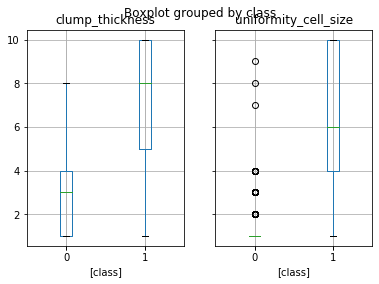

In [32]:
boxplot = cancer_data.boxplot ( column = [ 'clump_thickness', 'uniformity_cell_size' ], by = [ 'class' ] )

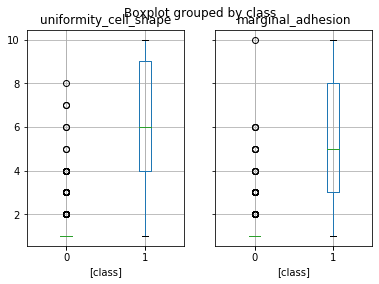

In [33]:
boxplot = cancer_data.boxplot ( column = [ 'uniformity_cell_shape', 'marginal_adhesion' ], by = [ 'class' ] )

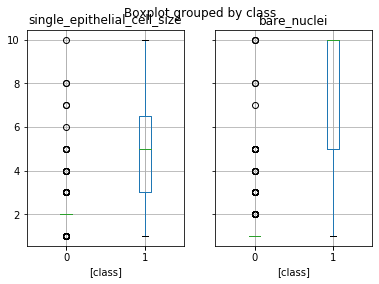

In [34]:
boxplot = cancer_data.boxplot ( column = ['single_epithelial_cell_size', 'bare_nuclei'], by = [ 'class' ] )

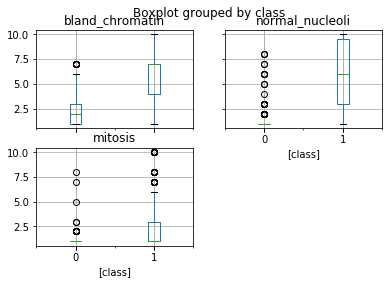

In [35]:
boxplot = cancer_data.boxplot ( column = [ 'bland_chromatin', 'normal_nucleoli', 'mitosis'  ], by = [ 'class' ] )

In [36]:
# Descriptive Statistics: Clump Thickness by Class
describe_by_category ( cancer_data, "clump_thickness", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     2.963964    7.188285
std      1.672661    2.437907
min      1.000000    1.000000
25%      1.000000    5.000000
50%      3.000000    8.000000
75%      4.000000   10.000000
max      8.000000   10.000000


In [37]:
# Descriptive Statistics: Uniformity Cell Size by Class
describe_by_category ( cancer_data, "uniformity_cell_size", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.306306    6.577406
std      0.855657    2.724244
min      1.000000    1.000000
25%      1.000000    4.000000
50%      1.000000    6.000000
75%      1.000000   10.000000
max      9.000000   10.000000


In [38]:
# Descriptive Statistics: Uniformity Cell Shape by Class
describe_by_category ( cancer_data, "uniformity_cell_shape", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.414414    6.560669
std      0.957031    2.569104
min      1.000000    1.000000
25%      1.000000    4.000000
50%      1.000000    6.000000
75%      1.000000    9.000000
max      8.000000   10.000000


In [39]:
# Descriptive Statistics: Marginal Adhesion by Class
describe_by_category ( cancer_data, "marginal_adhesion", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.346847    5.585774
std      0.917088    3.196631
min      1.000000    1.000000
25%      1.000000    3.000000
50%      1.000000    5.000000
75%      1.000000    8.000000
max     10.000000   10.000000


In [40]:
# Descriptive Statistics: Single Epithelial Cell Size by Class
describe_by_category ( cancer_data, "single_epithelial_cell_size", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     2.108108    5.326360
std      0.877112    2.443087
min      1.000000    1.000000
25%      2.000000    3.000000
50%      2.000000    5.000000
75%      2.000000    6.500000
max     10.000000   10.000000


In [41]:
# Descriptive Statistics: Bare Nuclei by Class
describe_by_category ( cancer_data, "bare_nuclei", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.346847    7.627615
std      1.177848    3.116679
min      1.000000    1.000000
25%      1.000000    5.000000
50%      1.000000   10.000000
75%      1.000000   10.000000
max     10.000000   10.000000


In [42]:
# Descriptive Statistics: Bland Chromatin by Class
describe_by_category ( cancer_data, "bland_chromatin", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     2.083333    5.974895
std      1.062299    2.282422
min      1.000000    1.000000
25%      1.000000    4.000000
50%      2.000000    7.000000
75%      3.000000    7.000000
max      7.000000   10.000000


In [43]:
# Descriptive Statistics: Normal Nucleoli by Class
describe_by_category ( cancer_data, "normal_nucleoli", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.261261    5.857741
std      0.954606    3.348876
min      1.000000    1.000000
25%      1.000000    3.000000
50%      1.000000    6.000000
75%      1.000000    9.500000
max      8.000000   10.000000


In [44]:
# Descriptive Statistics: Mitosis by Class
describe_by_category ( cancer_data, "mitosis", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.065315    2.602510
std      0.509738    2.564495
min      1.000000    1.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    3.000000
max      8.000000   10.000000


## Backpropagation Classification Experiments: Breast Cancer Data

### Assign Feature Matrix & Target Vector

In [45]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
# y = Target Array; Categorical instance class (i.e., doesn't include the attribute features)

feature_matrix, target_vector = (
        cancer_data.drop ( [ "class"], axis = 1 ).values,
        cancer_data [ "class" ].astype ( "category" ).cat.codes.values.reshape(-1,),
    )

### Run Backpropagation Classification
### Stratified Cross-Fold Validation

In [46]:
# Experiment: Breast Cancer Data

# Log Experiment: Running Backpropagation Classification Experiment on Breast Cancer Data
logger.info ( "Running Breast Cancer Backpropagation Classification Experiment" )

# Random Seed
np.random.seed ( 8032020 ) # Today's date

# Run the experiment
breast_cancer_results = run_classification_experiment (
    feature_matrix = feature_matrix, target_vector = target_vector, filename = "breast_cancer_predictions.csv"
)

# Log Breast Cancer Results
logger.info ( f"Breast Cancer Results: { dicttoolz.valmap ( np.mean, breast_cancer_results [ 'accuracy' ] ) } " )

INFO:__main__:Running Breast Cancer Backpropagation Classification Experiment
INFO:__main__:CV Iteration: 1
INFO:__main__:Standardizing data
INFO:__main__:Finding learning rate for H0
/Users/riccacallis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
INFO:__main__:Results: {'lr': 0.001}
INFO:__main__:Finding topology and learning rate for H1
INFO:__main__:Results: {'h1': 9, 'lr': 0.005}
INFO:__main__:Finding topology and learning rate for H2
INFO:__main__:Results: {'h1': 12, 'h2': 3, 'lr': 0.01}
INFO:__main__:Creating prediction output files: breast_cancer_predictions.csv
INFO:__main__:CV Iteration: 2
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 3
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 4
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 5
INFO:__main__:Standardizing data
INFO:__main__:Breast Cancer Results: {'h0': 0.9691916734252501, 'h1': 0.9677318194106516, 'h2': 0.96627196539

# Glass Data Set
## Extract, Transform, Load: Glass Data

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Glass+Identification

### Attribute Information: 10 Attributes (d)

1. Id number: 1 to 214 
2. RI: refractive index 
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) 
4. Mg: Magnesium 
5. Al: Aluminum 
6. Si: Silicon 
7. K: Potassium 
8. Ca: Calcium 
9. Ba: Barium 
10. Fe: Iron 

### One Class Label
11. Type of glass: (class attribute) 
        - 1 building_windows_float_processed
        - 2 building_windows_non_float_processed
        - 3 vehicle_windows_float_processed
        - 4 vehicle_windows_non_float_processed (none in this database) 
        - 5 containers
        - 6 tableware
        - 7 headlamps 

In [193]:
# Log ETL: Glass Data
logger.info ( "ETL: Glass Data Set" )
# Read Glass Data
glass_data = pd.read_csv ( "glass.data.csv",
    header = None,
    # Assign Column labels
    names = [
        "id_number",
        "refractive_index",
        "sodium",
        "magnesium",
        "aluminum",
        "silicon",
        "potassium",
        "calcium",
        "barium",
        "iron",
        "class",
    ],
)

INFO:__main__:ETL: Glass Data Set


In [48]:
# Verify whether any values are null
glass_data.isnull().values.any()

False

In [194]:
# Just to be sure
# Replace "?" instance
glass_data.replace ( "?", np.NaN )
# Drop na
glass_data.dropna ( axis = 0, inplace = True )

In [50]:
# Again
glass_data.isna().any()

id_number           False
refractive_index    False
sodium              False
magnesium           False
aluminum            False
silicon             False
potassium           False
calcium             False
barium              False
iron                False
class               False
dtype: bool

**Notes**

We see no NaN values in any of the columns

In [51]:
# Confirm data was properly read by examining data frame
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 11 columns):
id_number           214 non-null int64
refractive_index    214 non-null float64
sodium              214 non-null float64
magnesium           214 non-null float64
aluminum            214 non-null float64
silicon             214 non-null float64
potassium           214 non-null float64
calcium             214 non-null float64
barium              214 non-null float64
iron                214 non-null float64
class               214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 20.1 KB


**Notes** 

As expected, Dataframe shows us we have 214 total observations & 11 columns (or, 11 variables). Each variable has 214 observations, so we know we have no missing data. 

We see that the following variables are integers: id_number, class

We see that the following variables are floats: refractive_index, sodium, magnesium, aluminum, silicon, potassium, calcium, barium, iron

In [52]:
# Look at first few rows of dataframe
glass_data.head()

,id_number,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Notes**

Again, we see we'll need to eliminate id_number.

We also see that data instances here are continuous (float). We may want to discretize the boundaries for each variable.

In [195]:
# Drop id_number from cancer data set
glass_data.drop ( [ 'id_number' ], axis = 'columns', inplace = True )
# Confirm
glass_data.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [54]:
# Log ETL
logger.info ( f"ETL, Dataframe Info: { glass_data.head() }" )

INFO:__main__:ETL, Dataframe Info:    refractive_index  sodium  magnesium  aluminum  silicon  potassium  calcium  \
0           1.52101   13.64       4.49      1.10    71.78       0.06     8.75   
1           1.51761   13.89       3.60      1.36    72.73       0.48     7.83   
2           1.51618   13.53       3.55      1.54    72.99       0.39     7.78   
3           1.51766   13.21       3.69      1.29    72.61       0.57     8.22   
4           1.51742   13.27       3.62      1.24    73.08       0.55     8.07   

   barium  iron  class  
0     0.0   0.0      1  
1     0.0   0.0      1  
2     0.0   0.0      1  
3     0.0   0.0      1  
4     0.0   0.0      1  


## (Brief) Exploratory Data Analysis: Glass Data

### Single Variables

Let's look at the summary statistics & Tukey's 5

In [55]:
# Log EDA: Glass Data
logger.info ( "EDA: Glass Data Set" )

# Descriptive Statistics
glass_data.describe()

INFO:__main__:EDA: Glass Data Set


,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$

We'll likely want to discretize these attributes by class

In [56]:
# Log Descriptives
logger.info ( f"Descriptive Statistics: { glass_data.describe() }" )

INFO:__main__:Descriptive Statistics:        refractive_index      sodium   magnesium    aluminum     silicon  \
count        214.000000  214.000000  214.000000  214.000000  214.000000   
mean           1.518365   13.407850    2.684533    1.444907   72.650935   
std            0.003037    0.816604    1.442408    0.499270    0.774546   
min            1.511150   10.730000    0.000000    0.290000   69.810000   
25%            1.516523   12.907500    2.115000    1.190000   72.280000   
50%            1.517680   13.300000    3.480000    1.360000   72.790000   
75%            1.519157   13.825000    3.600000    1.630000   73.087500   
max            1.533930   17.380000    4.490000    3.500000   75.410000   

        potassium     calcium      barium        iron       class  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739  
min      0.000

## (Brief) Exploratory Data Analysis: Glass Data

### Pair-Wise: Attribute by Class

In [57]:
# Frequency of glass classifications
glass_data [ 'class' ].value_counts() # raw counts

2    76
1    70
7    29
3    17
5    13
6     9
Name: class, dtype: int64

**Notes**

Number of observations for each glass classification:
    - 2 (building_windows_non_float_processed): 76
    - 1 (building_windows_float_processed): 70
    - 7 (headlamps): 29
    - 3 (vehicle_windows_float_processed): 17
    - 5 (containers): 13
    - 6 (tableware): 9

In [58]:
#Log Pair-Wise Attribute by Class
logger.info ( f"Pair-Wise Attribute by Class: { glass_data [ 'class' ].value_counts() }" )

INFO:__main__:Pair-Wise Attribute by Class: 2    76
1    70
7    29
3    17
5    13
6     9
Name: class, dtype: int64


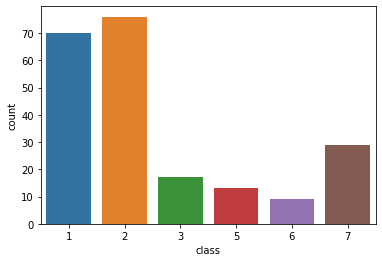

In [59]:
# Plot diagnosos frequencies
sns.countplot ( glass_data [ 'class' ],label = "Count" ) # boxplot

**Notes**

Number of observations for each glass classification:
    - 2 (building_windows_non_float_processed): 76
    - 1 (bhilding_windows_float_processed): 70
    - 7 (headlamps): 29
    - 3 (vehicle_windows_float_processed): 17
    - 5 (containers): 13
    - 6 (tableware): 9

In [60]:
# Descriptive Statistics: Describe each variable by class (means only)
glass_data.groupby ( [ 'class' ] )[ 'refractive_index', "sodium", "magnesium", "aluminum","silicon","potassium","calcium","barium","iron" ].mean()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
class,,,,,,,,,
1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


In [61]:
# Descriptive Statistics: Describe each variable by class (all variables)
glass_data.groupby ( [ 'class' ] ) [ 'refractive_index', "sodium", "magnesium", "aluminum","silicon","potassium","calcium","barium","iron" ].describe()        

refractive_index                                                   \
                 count      mean       std      min       25%       50%   
class                                                                     
1                 70.0  1.518718  0.002268  1.51215  1.517540  1.517835   
2                 76.0  1.518619  0.003802  1.51409  1.516377  1.517100   
3                 17.0  1.517964  0.001916  1.51610  1.516550  1.517690   
5                 13.0  1.518928  0.003345  1.51316  1.516660  1.519940   
6                  9.0  1.517456  0.003116  1.51115  1.518290  1.518880   
7                 29.0  1.517116  0.002545  1.51131  1.516090  1.516510   

                         sodium             ... barium        iron            \
            75%      max  count       mean  ...    75%   max count      mean   
class                                       ...                                
1      1.519560  1.52667   70.0  13.242286  ...   0.00  0.69  70.0  0.057000   
2      1.518487  1.53393   76.0  13.111711  ...   0.00  3.15  76.0  0.079737   
3      1.518320  1.52211   17.0  13.437059  ...   0.00  0.15  17.0  0.057059   
5      1.521190  1.52369   13.0  12.827692  ...   0.00  2.20  13.0  0.060769   
6      1.519160  1.51969    9.0  14.646667  ...   0.00  0.00   9.0  0.000000   
7      1.517270  1.52365   29.0  14.442069  ...   1.59  2.88  29.0  0.013448   

                                             
            std  min  25%  50%    75%   max  
class                                        
1      0.089075  0.0  0.0  0.0  0.110  0.31  
2      0.106433  0.0  0.0  0.0  0.155  0.35  
3      0.107864  0.0  0.0  0.0  0.090  0.37  
5      0.155588  0.0  0.0  0.0  0.000  0.51  
6      0.000000  0.0  0.0  0.0  0.000  0.00  
7      0.029794  0.0  0.0  0.0  0.000  0.09  

[6 rows x 72 columns]

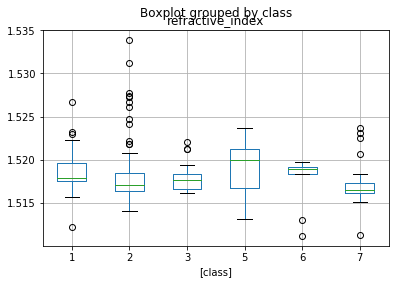

In [62]:
boxplot = glass_data.boxplot ( column = [ 'refractive_index' ], by = [ 'class' ] )

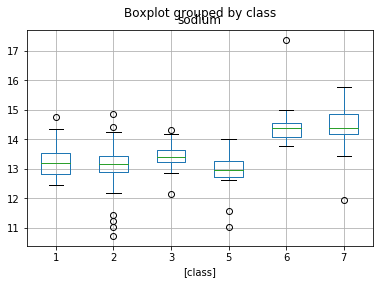

In [63]:
boxplot = glass_data.boxplot ( column = [ 'sodium' ], by = [ 'class' ] )

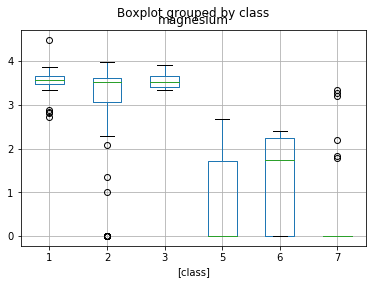

In [64]:
boxplot = glass_data.boxplot ( column = [ "magnesium" ], by = [ 'class' ] )

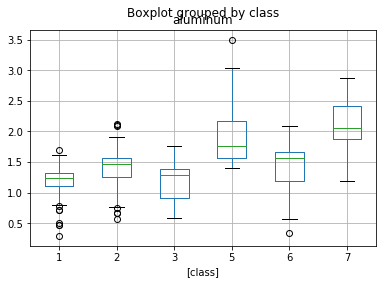

In [65]:
boxplot = glass_data.boxplot ( column = [ "aluminum" ], by = [ 'class' ] )

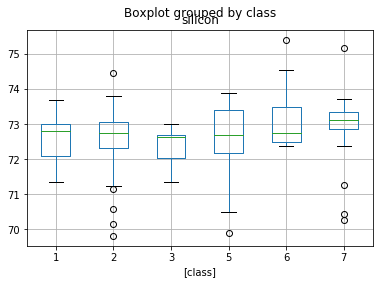

In [66]:
boxplot = glass_data.boxplot ( column = [ "silicon" ], by = [ 'class' ] )

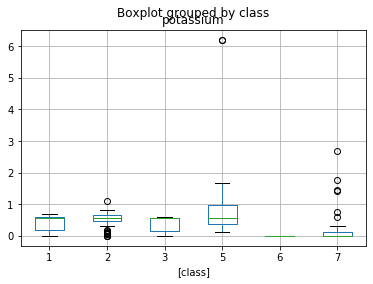

In [67]:
boxplot = glass_data.boxplot ( column = [ "potassium" ], by = [ 'class' ] )

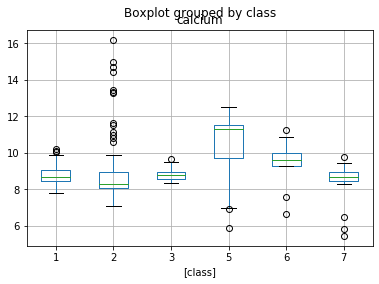

In [68]:
boxplot = glass_data.boxplot ( column = [ "calcium" ], by = [ 'class' ] )

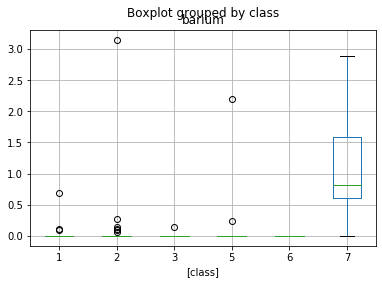

In [69]:
boxplot = glass_data.boxplot ( column = [ "barium" ], by = [ 'class' ] )

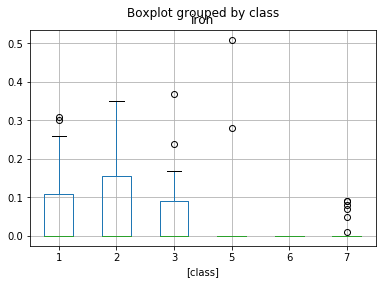

In [70]:
boxplot = glass_data.boxplot ( column = [ "iron" ], by = [ 'class' ] )

In [71]:
# Descriptive Statistics: Describe each variable by class
# Refractive Index by Class
describe_by_category ( glass_data, "refractive_index", "class", transpose = True )

class          1          2          3          5         6          7
count  70.000000  76.000000  17.000000  13.000000  9.000000  29.000000
mean    1.518718   1.518619   1.517964   1.518928  1.517456   1.517116
std     0.002268   0.003802   0.001916   0.003345  0.003116   0.002545
min     1.512150   1.514090   1.516100   1.513160  1.511150   1.511310
25%     1.517540   1.516377   1.516550   1.516660  1.518290   1.516090
50%     1.517835   1.517100   1.517690   1.519940  1.518880   1.516510
75%     1.519560   1.518487   1.518320   1.521190  1.519160   1.517270
max     1.526670   1.533930   1.522110   1.523690  1.519690   1.523650


**Notes**

We observe that for each class, the arithmetic mean of refractive index has very little variability.  We can discretize the boundary to roughly 1.518 for all classes

In [72]:
# Descriptive Statistics: Describe each variable by class
# Sodium by Class
describe_by_category ( glass_data, "sodium", "class", transpose = True )

class          1          2          3          5          6          7
count  70.000000  76.000000  17.000000  13.000000   9.000000  29.000000
mean   13.242286  13.111711  13.437059  12.827692  14.646667  14.442069
std     0.499301   0.664159   0.506887   0.777037   1.084020   0.686359
min    12.450000  10.730000  12.160000  11.030000  13.790000  11.950000
25%    12.825000  12.885000  13.240000  12.730000  14.090000  14.200000
50%    13.195000  13.155000  13.420000  12.970000  14.400000  14.390000
75%    13.525000  13.432500  13.640000  13.270000  14.560000  14.860000
max    14.770000  14.860000  14.320000  14.010000  17.380000  15.790000


**Notes**

We see here that values range from 10.73 to 15.79, with mean values hovering around 13.2, 12.8, and 14.5. It would be logical to discretize into: 10.5, 12.5, 14.5

In [73]:
# Descriptive Statistics: Describe each variable by class
# Magnesium by Class
describe_by_category ( glass_data, "magnesium", "class", transpose = True )

class          1          2          3          5         6          7
count  70.000000  76.000000  17.000000  13.000000  9.000000  29.000000
mean    3.552429   3.002105   3.543529   0.773846  1.305556   0.538276
std     0.247043   1.215661   0.162786   0.999146  1.097134   1.117683
min     2.710000   0.000000   3.340000   0.000000  0.000000   0.000000
25%     3.480000   3.057500   3.400000   0.000000  0.000000   0.000000
50%     3.565000   3.520000   3.530000   0.000000  1.740000   0.000000
75%     3.657500   3.622500   3.650000   1.710000  2.240000   0.000000
max     4.490000   3.980000   3.900000   2.680000  2.410000   3.340000


**Notes**

We see here that values range from 0 (min class 2) to 4.49 (max class 1). Means range from 3.55 (Class 1), 3.00 (Class 2), 3.54 (Class 3), 0.77 (Class 5), 1.30 (Class 6), and 0.538 (Class 7). We'll discretize to 1, 2, 3, 4

In [74]:
# Descriptive Statistics: Describe each variable by class
# Aluminum by Class
describe_by_category ( glass_data, "aluminum", "class", transpose = True )

class          1          2          3          5         6          7
count  70.000000  76.000000  17.000000  13.000000  9.000000  29.000000
mean    1.163857   1.408158   1.201176   2.033846  1.366667   2.122759
std     0.273158   0.318340   0.347489   0.693920  0.571861   0.442726
min     0.290000   0.560000   0.580000   1.400000  0.340000   1.190000
25%     1.112500   1.247500   0.910000   1.560000  1.190000   1.870000
50%     1.230000   1.460000   1.280000   1.760000  1.560000   2.060000
75%     1.327500   1.570000   1.380000   2.170000  1.660000   2.420000
max     1.690000   2.120000   1.760000   3.500000  2.090000   2.880000


**Notes**

We see here that values range from 0.29 (Min Class 1) to 3.5 (Max Class 5). Means range from 1.16 (Class 1), 1.40 (Class 2), 1.2 (Class 3), 2.0 (Class 5),1.36 (Class 6), 2.12 (Class 7) and stds range from 0.27 up to 0.69. We'll; discretize to 0.5, 1, 1.5, 2, 2.5

In [75]:
# Descriptive Statistics: Describe each variable by class
# Silicon by Class
describe_by_category ( glass_data, "silicon", "class", transpose = True )

class          1          2          3          5          6          7
count  70.000000  76.000000  17.000000  13.000000   9.000000  29.000000
mean   72.619143  72.598026  72.404706  72.366154  73.206667  72.965862
std     0.569484   0.724573   0.512276   1.282319   1.079467   0.940234
min    71.350000  69.810000  71.360000  69.890000  72.370000  70.260000
25%    72.080000  72.330000  72.040000  72.180000  72.500000  72.860000
50%    72.815000  72.735000  72.640000  72.690000  72.740000  73.110000
75%    73.017500  73.062500  72.700000  73.390000  73.480000  73.360000
max    73.700000  74.450000  73.010000  73.880000  75.410000  75.180000


**Notes**

We see here that values range from 69.81 (Min Class 2) to 75.41 (Max Class 6). Means are all roughly equivalent, rangiong from 72.59 (Class 2) to 73.20 (Class 6). We'll discretize to 72.5, 73.0, 73.5, 74.0

In [76]:
# Descriptive Statistics: Describe each variable by class
# Potassium by Class
describe_by_category ( glass_data, "potassium", "class", transpose = True )

class          1          2          3          5    6          7
count  70.000000  76.000000  17.000000  13.000000  9.0  29.000000
mean    0.447429   0.521053   0.406471   1.470000  0.0   0.325172
std     0.214879   0.213726   0.229890   2.138695  0.0   0.668493
min     0.000000   0.000000   0.000000   0.130000  0.0   0.000000
25%     0.200000   0.480000   0.160000   0.380000  0.0   0.000000
50%     0.560000   0.580000   0.560000   0.580000  0.0   0.000000
75%     0.590000   0.650000   0.570000   0.970000  0.0   0.140000
max     0.690000   1.100000   0.610000   6.210000  0.0   2.700000


**Notes**

We see here that values range from 0 to 6.21 (Max Class 8). We'll discretize to 0.2, 0.6, 1.2, 1.6

In [77]:
# Descriptive Statistics: Describe each variable by class
# Calcium by Class
describe_by_category ( glass_data, "calcium", "class", transpose = True )

class          1          2          3          5          6          7
count  70.000000  76.000000  17.000000  13.000000   9.000000  29.000000
mean    8.797286   9.073684   8.782941  10.123846   9.356667   8.491379
std     0.574807   1.921635   0.380111   2.183791   1.449948   0.973505
min     7.780000   7.080000   8.320000   5.870000   6.650000   5.430000
25%     8.430000   8.037500   8.530000   9.700000   9.260000   8.440000
50%     8.675000   8.275000   8.790000  11.270000   9.570000   8.670000
75%     9.052500   8.915000   8.930000  11.530000   9.950000   8.950000
max    10.170000  16.190000   9.650000  12.500000  11.220000   9.760000


**Notes**

We see that the values range from 5.43 (Min Class 7) to 16.19 (Max Class 2). We'll discretize to 6, 9, 12

In [78]:
# Descriptive Statistics: Describe each variable by class
# Barium by Class
describe_by_category ( glass_data, "barium", "class", transpose = True )

class          1          2          3          5    6          7
count  70.000000  76.000000  17.000000  13.000000  9.0  29.000000
mean    0.012714   0.050263   0.008824   0.187692  0.0   1.040000
std     0.083838   0.362340   0.036380   0.608251  0.0   0.665341
min     0.000000   0.000000   0.000000   0.000000  0.0   0.000000
25%     0.000000   0.000000   0.000000   0.000000  0.0   0.610000
50%     0.000000   0.000000   0.000000   0.000000  0.0   0.810000
75%     0.000000   0.000000   0.000000   0.000000  0.0   1.590000
max     0.690000   3.150000   0.150000   2.200000  0.0   2.880000


**Notes**

We see that the values range from 0 to 3.15. We'll discretize to 0.5, 1.0, 2.0

In [79]:
# Descriptive Statistics: Describe each variable by class
# Iron by Class
describe_by_category ( glass_data, "iron", "class", transpose = True )

class          1          2          3          5    6          7
count  70.000000  76.000000  17.000000  13.000000  9.0  29.000000
mean    0.057000   0.079737   0.057059   0.060769  0.0   0.013448
std     0.089075   0.106433   0.107864   0.155588  0.0   0.029794
min     0.000000   0.000000   0.000000   0.000000  0.0   0.000000
25%     0.000000   0.000000   0.000000   0.000000  0.0   0.000000
50%     0.000000   0.000000   0.000000   0.000000  0.0   0.000000
75%     0.110000   0.155000   0.090000   0.000000  0.0   0.000000
max     0.310000   0.350000   0.370000   0.510000  0.0   0.090000


**Notes**

We see that the values range from 0 to 0.51 (Max Class 5). We'll discretize to 0.2 and 0.6

In [80]:
# Discretize
#discretize_boundries_glass = {
    #"refractive_index": [1.518],
    #"sodium": [10.5, 12.5, 14.5],
    #"magnesium": [1, 2, 3, 4],
    #"aluminum": [0.5, 1.5, 2, 2.5],
    #"silicon": [72.5, 73.0, 73.5, 74.0],
    #"potassium": [0.2, 0.6, 1.2, 1.6],
    #"calcium": [6, 9, 12],
    #"barium": [0.5, 1.0, 2.0],
    #"iron": [0.2, 0.6],
#}

## Backpropagation Classification Experiments: Glass Data

### Assign Feature Matrix & Target Vector

In [196]:
# Assign Xs & Ys
# Eliminate id_number
# Set class as category y (target array)
# Set attributes as X (feature matrix)

#X_glass, y_glass = discretize_dataframe (
    #glass_data.drop ( "id_number", axis = 1 ), discretize_boundries_glass
#).pipe(
    #lambda df: (
        #df.drop ( "class", axis = 1 ).values,
        #df [ "class" ].astype ( "category" ).cat.codes.values,
    #)
#)

feature_matrix, target_vector = (
        glass_data.drop ( [ "class" ], axis = 1 ).values,
        glass_data [ "class" ].astype ( "category" ).cat.codes.values,
    )

### Run Backpropagation 
### Stratified Cross-Fold Validation

In [197]:
# Log Experiment: Running Backpropagation Classification Experiment on Glass Data
logger.info ( "Running Glass Backpropagation Classification Experiment" )

# Random Seed
np.random.seed ( 8032020 ) #Today's date

# Run Glass Experiment
glass_results = run_classification_experiment (
    feature_matrix,
    target_vector = target_vector,
    learning_rate_choices = np.linspace ( 0.025, 0.1, 5 ),
    hidden_layer_choices = [ 3, 5, 7, 8 ],
    n_iterations = 1000,
    conv_tol = 0.0001,
    filename = "glass_prediction_results.csv",
)

# Log Glass Results
logger.info ( f"Glass Results: { dicttoolz.valmap ( np.mean, glass_results [ 'accuracy' ] ) }"
            )

INFO:__main__:Running Glass Backpropagation Classification Experiment
INFO:__main__:CV Iteration: 1
INFO:__main__:Standardizing data
INFO:__main__:Finding learning rate for H0
/Users/riccacallis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
INFO:__main__:Results: {'lr': 0.025}
INFO:__main__:Finding topology and learning rate for H1
INFO:__main__:Results: {'h1': 7, 'lr': 0.0625}
INFO:__main__:Finding topology and learning rate for H2
INFO:__main__:Results: {'h1': 5, 'h2': 7, 'lr': 0.025}
INFO:__main__:Creating prediction output files: glass_prediction_results.csv
INFO:__main__:CV Iteration: 2
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 3
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 4
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 5
INFO:__main__:Standardizing data
INFO:__main__:Glass Results: {'h0': 0.45948572099734897, 'h1': 0.3421653411188295, 'h2': 0.38456290479546296, 'baseli

# Iris Data Set
## Extract, Transform, Load: Iris Data

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Iris

### Attribute Information: 5 Attributes (d)

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

### One Class Label
5. Type of Iris (class):
        - Iris Setosa 
        - Iris Versicolour
        - Iris Virginica

In [85]:
# Log ETL: Iris Data
logger.info ( "ETL: Iris Data Set" )

# Read Iris Data
iris_data = pd.read_csv ( "iris.data.csv",
        header = 0,
        # Assign Column Labels (i.e., variables names)
        names = [
            "sepal_length", 
            "sepal_width", 
            "petal_length", 
            "petal_width", 
            "class"],
)

INFO:__main__:ETL: Iris Data Set


In [86]:
# Verify whether any values are null
iris_data.isnull().values.any()

False

**Notes**

We observe no null instances

In [87]:
# Replace "?" instance
iris_data.replace ( "?", np.NaN )
# Drop na
iris_data.dropna ( axis = 0, inplace = True )

In [88]:
# Again
iris_data.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool

**Notes**

We observe no null instances in any of the attribute columns

In [89]:
# Confirm data was properly read by examining data frame
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_length    149 non-null float64
sepal_width     149 non-null float64
petal_length    149 non-null float64
petal_width     149 non-null float64
class           149 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


**Notes**

We observe that each attribute is a float

In [90]:
# Look at first few rows of dataframe
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [91]:
# Log ETL
logger.info ( f"ETL, Dataframe Info: { iris_data.head() }" )

INFO:__main__:ETL, Dataframe Info:    sepal_length  sepal_width  petal_length  petal_width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


In [93]:
# Classification for Class Label: data frame for this category
iris_data[ "class" ].astype ( "category" ).cat.codes.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

## (Brief) Exploratory Data Analysis: Iris Data

### Single Variable

In [94]:
# Log EDA: Iris Data
logger.info ( "EDA: Iris Data Set" )

# Descriptive Statistics
iris_data.describe()

INFO:__main__:EDA: Iris Data Set


,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Notes**

Total number of observations: 149

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$

In [95]:
# Log Descriptives
logger.info ( f"Descriptive Statistics: { iris_data.describe() }" )

INFO:__main__:Descriptive Statistics:        sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## (Brief) Exploratory Data Analysis: Iris Data

### Pair-Wise: Attribute by Class

In [96]:
# Frequency of diagnoses classifications
iris_data [ 'class' ].value_counts() # raw counts

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: class, dtype: int64

**Notes**

We see there are 50 instances of Iris Virginica, 50 instances of Iris Versicolor, and 50 instances of Iris-setosa

In [97]:
#Log Pair-Wise Attribute by Class
logger.info ( f"Pair-Wise Attribute by Class: { iris_data [ 'class' ].value_counts() }" )

INFO:__main__:Pair-Wise Attribute by Class: Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: class, dtype: int64


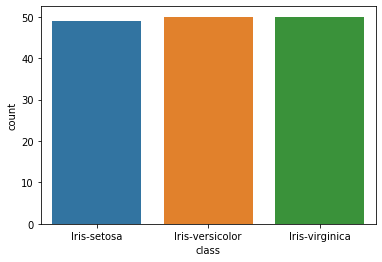

In [98]:
# Plot diagnosos frequencies
sns.countplot ( iris_data [ 'class' ],label = "Count" ) # boxplot

In [99]:
# Descriptive Statistics: Describe each variable by class (means only)
iris_data.groupby ( [ 'class' ] )[ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' ].mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.004082,3.416327,1.465306,0.244898
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.588000,2.974000,5.552000,2.026000


In [100]:
# Descriptive Statistics: Describe each variable by class (means only)
iris_data.groupby ( [ 'class' ] )[ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' ].describe()

sepal_length                                                 \
                       count      mean       std  min    25%  50%  75%  max   
class                                                                         
Iris-setosa             49.0  5.004082  0.355879  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936000  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588000  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width            ... petal_length      petal_width  \
                      count      mean  ...          75%  max       count   
class                                  ...                                 
Iris-setosa            49.0  3.416327  ...        1.600  1.9        49.0   
Iris-versicolor        50.0  2.770000  ...        4.600  5.1        50.0   
Iris-virginica         50.0  2.974000  ...        5.875  6.9        50.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
class                                                         
Iris-setosa      0.244898  0.108130  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326000  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026000  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

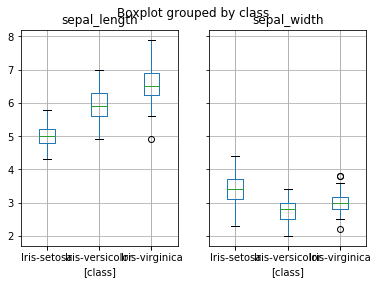

In [101]:
boxplot = iris_data.boxplot ( column = [ "sepal_length", "sepal_width"], by = [ 'class' ] )

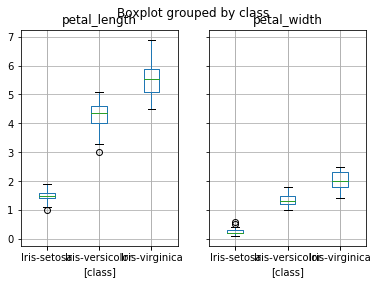

In [102]:
boxplot = iris_data.boxplot ( column = [ "petal_length", "petal_width" ], by = [ 'class' ] )

In [103]:
# Descriptive Statistics: Attribute by Class
# Sepal Length by Class
describe_by_category ( iris_data, "sepal_length", "class", transpose = True )

class  Iris-setosa  Iris-versicolor  Iris-virginica
count    49.000000        50.000000        50.00000
mean      5.004082         5.936000         6.58800
std       0.355879         0.516171         0.63588
min       4.300000         4.900000         4.90000
25%       4.800000         5.600000         6.22500
50%       5.000000         5.900000         6.50000
75%       5.200000         6.300000         6.90000
max       5.800000         7.000000         7.90000


**Notes**

We see that sepal length ranges from 4.3 (Iris-setosa) to 7.9 (Iris-virginica).The mean for Iris-setosa is 5.00 (std 0.355). The mean for Iris-versicolor is 5.9 (std 0.516). The mean for Iris-virginica is 6.5 (std 0.635). We'll discretize using 4.5, 5.5, 6.5, 7.5.

In [104]:
# Descriptive Statistics: Attribute by Class
# Sepal Width by Class
describe_by_category ( iris_data, "sepal_width", "class", transpose = True )

class  Iris-setosa  Iris-versicolor  Iris-virginica
count    49.000000        50.000000       50.000000
mean      3.416327         2.770000        2.974000
std       0.384787         0.313798        0.322497
min       2.300000         2.000000        2.200000
25%       3.100000         2.525000        2.800000
50%       3.400000         2.800000        3.000000
75%       3.700000         3.000000        3.175000
max       4.400000         3.400000        3.800000


**Notes**

We see that sepal width ranges from 2.0 (Iris-versicolor) to 4.4 (Iris-setosa).The mean for Iris-setosa is 3.41 (std 0.384). The mean for Iris-versicolor is 2.77 (std 0.516). The mean for Iris-virginica is 2.97 (std 0.322). We'll discretize using 2, 3, 4.

In [105]:
# Descriptive Statistics: Attribute by Class
# Petal Length by Class
describe_by_category ( iris_data, "petal_length", "class", transpose = True )

class  Iris-setosa  Iris-versicolor  Iris-virginica
count    49.000000        50.000000       50.000000
mean      1.465306         4.260000        5.552000
std       0.175061         0.469911        0.551895
min       1.000000         3.000000        4.500000
25%       1.400000         4.000000        5.100000
50%       1.500000         4.350000        5.550000
75%       1.600000         4.600000        5.875000
max       1.900000         5.100000        6.900000


**Notes**

We see that petal length ranges from 1.0 (Iris-versicolor) to 6.9 (Iris-virginica).The mean for Iris-setosa is 1.46 (std 0.175). The mean for Iris-versicolor is 4.26 (std 0.469). The mean for Iris-virginica is 5.55 (std 0.355). We'll discretize using 1, 2, 4, 6.

In [106]:
# Descriptive Statistics: Attribute by Class
# Petal Width by Class
describe_by_category ( iris_data, "petal_width", "class", transpose = True )

class  Iris-setosa  Iris-versicolor  Iris-virginica
count    49.000000        50.000000        50.00000
mean      0.244898         1.326000         2.02600
std       0.108130         0.197753         0.27465
min       0.100000         1.000000         1.40000
25%       0.200000         1.200000         1.80000
50%       0.200000         1.300000         2.00000
75%       0.300000         1.500000         2.30000
max       0.600000         1.800000         2.50000


**Notes**

We see that petal width ranges from 0.10 (Iris-setosa) to 2.5 (Iris-virginica). The mean for Iris-setosa is 0.244 (std 0.108). The mean for Iris-versicolor is 1.32 (std 0.197). The mean for Iris-virginica is 2.02 (std 0.27). We'll discretize using 0.5, 1, 1.5, 2

In [107]:
# Discretize the data
#X_iris, y_iris = discretize_dataframe (
    #iris_data,
    #discretize_boundries = {
        #"sepal_length": [4.5, 5.5, 6.5, 7.5],
        #"sepal_width": [2, 3, 4],
        #"petal_width": [0.5, 1, 1.5, 2],
        #"petal_length": [1, 2, 4, 6],
    #},
#).pipe(
    #lambda df: (
        #df.filter ( like = "]" ).values,
        #df [ "class" ].astype ( "category" ).cat.codes.values,
    #)
#)

## Backpropagation Classification Experiments: Iris Data

### Assign Feature Matrix & Target Vector


In [108]:
# Drop columns with no variance
iris_data.pipe ( lambda df: df.loc ( axis = 1 )[ df.nunique() > 1 ] )  

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [110]:
# Set class as category y (target array)
# Set attributes as X (features matrix)
feature_matrix, target_vector = (
    iris_data.drop ( [ "class" ], axis = 1 ).values,
    iris_data [ "class" ].astype ( "category" ).cat.codes.values,
)

### Run Backpropagation
### Stratified Cross-Fold Validation

In [111]:
# Experiment: Iris Data

# Log Experiment: Running Backpropagation Classification Experiment on Iris Data
logger.info ( "Running Iris Backpropagation Classification Experiment" )

iris_results = run_classification_experiment (
    feature_matrix = feature_matrix,
    target_vector = target_vector,
    learning_rate_choices = list ( np.linspace ( 0.01, 0.8, 5 ) ),
    hidden_layer_choices = [ 3, 4 ],
    n_iterations = 500,
    conv_tol = 0.001,
    filename = "iris_prediction_results.csv",
)

logger.info ( f"Iris Results: { dicttoolz.valmap ( np.mean, iris_results [ 'accuracy' ] ) }" 
            )

INFO:__main__:Running Iris Backpropagation Classification Experiment
INFO:__main__:CV Iteration: 1
INFO:__main__:Standardizing data
INFO:__main__:Finding learning rate for H0
/Users/riccacallis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
INFO:__main__:Results: {'lr': 0.01}
INFO:__main__:Finding topology and learning rate for H1
INFO:__main__:Results: {'h1': 3, 'lr': 0.6025}
INFO:__main__:Finding topology and learning rate for H2
INFO:__main__:Results: {'h1': 4, 'h2': 4, 'lr': 0.8}
INFO:__main__:Creating prediction output files: iris_prediction_results.csv
INFO:__main__:CV Iteration: 2
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 3
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 4
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 5
INFO:__main__:Standardizing data
INFO:__main__:Iris Results: {'h0': 0.7319540229885056, 'h1': 0.8995402298850574, 'h2': 0.6643678160919539, 'baseline': 0.3

# Soybean Data Set
## Extract, Transform, Load: Soybean Data

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Soybean+%28Small%29

### Attribute Information: 10 Attributes (d)

1. date: april,may,june,july,august,september,october,?. 
2. plant-stand: normal,lt-normal,?. 
3. precip: lt-norm,norm,gt-norm,?. 
4. temp: lt-norm,norm,gt-norm,?. 
5. hail: yes,no,?. 
6. crop-hist: diff-lst-year,same-lst-yr,same-lst-two-yrs, same-lst-sev-yrs,?. 
7. area-damaged: scattered,low-areas,upper-areas,whole-field,?. 
8. severity: minor,pot-severe,severe,?. 
9. seed-tmt: none,fungicide,other,?. 
10. germination: 90-100%,80-89%,lt-80%,?. 
11. plant-growth: norm,abnorm,?. 
12. leaves: norm,abnorm. 
13. leafspots-halo: absent,yellow-halos,no-yellow-halos,?. 
14. leafspots-marg: w-s-marg,no-w-s-marg,dna,?. 
15. leafspot-size: lt-1/8,gt-1/8,dna,?. 
16. leaf-shread: absent,present,?. 
17. leaf-malf: absent,present,?. 
18. leaf-mild: absent,upper-surf,lower-surf,?. 
19. stem: norm,abnorm,?. 
20. lodging: yes,no,?. 
21. stem-cankers: absent,below-soil,above-soil,above-sec-nde,?. 
22. canker-lesion: dna,brown,dk-brown-blk,tan,?. 
23. fruiting-bodies: absent,present,?. 
24. external decay: absent,firm-and-dry,watery,?. 
25. mycelium: absent,present,?. 
26. int-discolor: none,brown,black,?. 
27. sclerotia: absent,present,?. 
28. fruit-pods: norm,diseased,few-present,dna,?. 
29. fruit spots: absent,colored,brown-w/blk-specks,distort,dna,?. 
30. seed: norm,abnorm,?. 
31. mold-growth: absent,present,?. 
32. seed-discolor: absent,present,?. 
33. seed-size: norm,lt-norm,?. 
34. shriveling: absent,present,?. 
35. roots: norm,rotted,galls-cysts,?.

### One Class Label

36. Class

In [112]:
# Log ETL: Soybean Data
logger.info ( "ETL: Soybean Data Set" )

# Read Soybean Data
soybean_data = pd.read_csv ( "soybean-small.data.csv",
        header = 0,
        # Assign Column Labels (i.e., variables names)
        names = [
            "date",
            "plant-stand",
            "precip",
            "temp",
            "hail",
            "crop-hist",
            "area-damaged",
            "severity",
            "seed-tmt",
            "germination",
            "plant-growth",
            "leaves",
            "leafspots-halo",
            "leafspots-marg",
            "leafspot-size",
            "leaf-shread",
            "leaf-malf",
            "leaf-mild",
            "stem",
            "lodging",
            "stem-cankers",
            "canker-lesion",
            "fruiting-bodies",
            "external decay",
            "mycelium",
            "int-discolor",
            "sclerotia",
            "fruit-pods",
            "fruit spots",
            "seed",
            "mold-growth",
            "seed-discolor",
            "seed-size",
            "shriveling",
            "roots",
            "instance_class",
        ],
    )

INFO:__main__:ETL: Soybean Data Set


In [113]:
# Verify whether any values are null
soybean_data.isnull().values.any()

False

**Note**

We see there are no null instances

In [114]:
# Replace "?" instance
soybean_data.replace ( "?", np.NaN )
# Drop na
soybean_data.dropna ( axis = 0, inplace = True )

In [115]:
# Again
soybean_data.isna().any()

date               False
plant-stand        False
precip             False
temp               False
hail               False
crop-hist          False
area-damaged       False
severity           False
seed-tmt           False
germination        False
plant-growth       False
leaves             False
leafspots-halo     False
leafspots-marg     False
leafspot-size      False
leaf-shread        False
leaf-malf          False
leaf-mild          False
stem               False
lodging            False
stem-cankers       False
canker-lesion      False
fruiting-bodies    False
external decay     False
mycelium           False
int-discolor       False
sclerotia          False
fruit-pods         False
fruit spots        False
seed               False
mold-growth        False
seed-discolor      False
seed-size          False
shriveling         False
roots              False
instance_class     False
dtype: bool

**Notes**

Again, we find no NaN instances in any of the column attributes. We also observe that the last column is the class label

In [116]:
# Confirm data was properly read by examining data frame
soybean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 36 columns):
date               46 non-null int64
plant-stand        46 non-null int64
precip             46 non-null int64
temp               46 non-null int64
hail               46 non-null int64
crop-hist          46 non-null int64
area-damaged       46 non-null int64
severity           46 non-null int64
seed-tmt           46 non-null int64
germination        46 non-null int64
plant-growth       46 non-null int64
leaves             46 non-null int64
leafspots-halo     46 non-null int64
leafspots-marg     46 non-null int64
leafspot-size      46 non-null int64
leaf-shread        46 non-null int64
leaf-malf          46 non-null int64
leaf-mild          46 non-null int64
stem               46 non-null int64
lodging            46 non-null int64
stem-cankers       46 non-null int64
canker-lesion      46 non-null int64
fruiting-bodies    46 non-null int64
external decay     46 non-null int64
mycelium 

**Notes**

We see n = 46 and there are 46 instances in each attribute column (thus, no missing data). All attribute (Xs) columns are integers and the instance class is an object.

## (Brief) Exploratory Data Analysis: Soybean Data

### Single Variable

Let's look at the summary statistics & Tukey's 5

In [117]:
# Look at first few rows
soybean_data.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,instance_class
0,5,0,2,1,0,3,1,1,1,2,...,0,0,4,0,0,0,0,0,0,D1
1,3,0,2,1,0,2,0,2,1,1,...,0,0,4,0,0,0,0,0,0,D1
2,6,0,2,1,0,1,1,1,0,0,...,0,0,4,0,0,0,0,0,0,D1
3,4,0,2,1,0,3,0,2,0,2,...,0,0,4,0,0,0,0,0,0,D1
4,5,0,2,1,0,2,0,1,1,0,...,0,0,4,0,0,0,0,0,0,D1


**Notes**

We see that we'll need to use one-hot encoding for the instance class and we may need to eliminate columns where data has no variance. These will not help the algorithm learn classes. 

In [118]:
# Drop columns with no variance
for col in soybean_data.columns:
    if len ( soybean_data [ col ].unique()) == 1:
        soybean_data.drop ( col,inplace = True, axis = 1 )
# Confirm
soybean_data.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots,instance_class
0,5,0,2,1,0,3,1,1,1,2,...,3,0,1,1,0,0,0,0,0,D1
1,3,0,2,1,0,2,0,2,1,1,...,3,0,1,1,0,0,0,0,0,D1
2,6,0,2,1,0,1,1,1,0,0,...,3,1,1,1,0,0,0,0,0,D1
3,4,0,2,1,0,3,0,2,0,2,...,3,1,1,1,0,0,0,0,0,D1
4,5,0,2,1,0,2,0,1,1,0,...,3,1,1,1,0,0,0,0,0,D1


In [119]:
print ( soybean_data.columns )

Index(['date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist',
       'area-damaged', 'severity', 'seed-tmt', 'germination', 'leaves',
       'lodging', 'stem-cankers', 'canker-lesion', 'fruiting-bodies',
       'external decay', 'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods',
       'roots', 'instance_class'],
      dtype='object')


In [122]:
# Rename column
soybean_data.rename ( columns = { "instance_class":"class" }, inplace = True)

In [123]:
# Assign class as category label
soybean_data [ "class" ].astype ( "category" ).cat.codes
# Confirm
soybean_data.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots,class
0,5,0,2,1,0,3,1,1,1,2,...,3,0,1,1,0,0,0,0,0,D1
1,3,0,2,1,0,2,0,2,1,1,...,3,0,1,1,0,0,0,0,0,D1
2,6,0,2,1,0,1,1,1,0,0,...,3,1,1,1,0,0,0,0,0,D1
3,4,0,2,1,0,3,0,2,0,2,...,3,1,1,1,0,0,0,0,0,D1
4,5,0,2,1,0,2,0,1,1,0,...,3,1,1,1,0,0,0,0,0,D1


In [124]:
# Log ETL
logger.info ( f"ETL, Dataframe Info: { soybean_data.head() }" )

INFO:__main__:ETL, Dataframe Info:    date  plant-stand  precip  temp  hail  crop-hist  area-damaged  severity  \
0     5            0       2     1     0          3             1         1   
1     3            0       2     1     0          2             0         2   
2     6            0       2     1     0          1             1         1   
3     4            0       2     1     0          3             0         2   
4     5            0       2     1     0          2             0         1   

   seed-tmt  germination  ...  stem-cankers  canker-lesion  fruiting-bodies  \
0         1            2  ...             3              0                1   
1         1            1  ...             3              0                1   
2         0            0  ...             3              1                1   
3         0            2  ...             3              1                1   
4         1            0  ...             3              1                1   

   external dec

In [125]:
# Find Y Categories
print ( soybean_data [ "class" ] )

0     D1
1     D1
2     D1
3     D1
4     D1
5     D1
6     D1
7     D1
8     D1
9     D2
10    D2
11    D2
12    D2
13    D2
14    D2
15    D2
16    D2
17    D2
18    D2
19    D3
20    D3
21    D3
22    D3
23    D3
24    D3
25    D3
26    D3
27    D3
28    D3
29    D4
30    D4
31    D4
32    D4
33    D4
34    D4
35    D4
36    D4
37    D4
38    D4
39    D4
40    D4
41    D4
42    D4
43    D4
44    D4
45    D4
Name: class, dtype: object


In [126]:
# Map class values to values
# D1 = 0; D2 = 1; D3 = 2; D4 = 3
soybean_data [ 'class' ] = soybean_data [ 'class' ].map ( { 'D1' : 0, 'D2' : 1, 'D3' : 2, 'D4': 3 } )
# Confirm
soybean_data.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots,class
0,5,0,2,1,0,3,1,1,1,2,...,3,0,1,1,0,0,0,0,0,0
1,3,0,2,1,0,2,0,2,1,1,...,3,0,1,1,0,0,0,0,0,0
2,6,0,2,1,0,1,1,1,0,0,...,3,1,1,1,0,0,0,0,0,0
3,4,0,2,1,0,3,0,2,0,2,...,3,1,1,1,0,0,0,0,0,0
4,5,0,2,1,0,2,0,1,1,0,...,3,1,1,1,0,0,0,0,0,0


In [127]:
print ( soybean_data [ 'class' ] )

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    3
44    3
45    3
Name: class, dtype: int64


In [128]:
# One-hot encoding/Dummy variables for all attribute columns
soybean_bool = pd.get_dummies (
    soybean_data,
    columns = [ col for col in soybean_data.columns if col != "class" ],
    drop_first = True,
)

# Confirm
soybean_bool.head()

,class,date_1,date_2,date_3,date_4,date_5,date_6,plant-stand_1,precip_1,precip_2,...,canker-lesion_1,canker-lesion_2,canker-lesion_3,fruiting-bodies_1,external decay_1,mycelium_1,int-discolor_2,sclerotia_1,fruit-pods_3,roots_1
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0


In [129]:
# Log ETL
logger.info ( f"ETL, Dataframe Info, One-Hot Encoding: { soybean_bool.head() }" )

INFO:__main__:ETL, Dataframe Info, One-Hot Encoding:    class  date_1  date_2  date_3  date_4  date_5  date_6  plant-stand_1  \
0      0       0       0       0       0       1       0              0   
1      0       0       0       1       0       0       0              0   
2      0       0       0       0       0       0       1              0   
3      0       0       0       0       1       0       0              0   
4      0       0       0       0       0       1       0              0   

   precip_1  precip_2  ...  canker-lesion_1  canker-lesion_2  canker-lesion_3  \
0         0         1  ...                0                0                0   
1         0         1  ...                0                0                0   
2         0         1  ...                1                0                0   
3         0         1  ...                1                0                0   
4         0         1  ...                1                0                0   

   fruiti

## (Brief) Exploratory Data Analysis: Soybean Data

### Single Variable

Let's look at the summary statistics & Tukey's 5


In [130]:
# Log EDA: Soybean Data
logger.info ( "EDA: Soybean Data Set" )

# Descriptive Statistics
soybean_data.describe()

INFO:__main__:EDA: Soybean Data Set


,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots,class
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.00000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,2.673913,0.543478,1.478261,0.760870,0.304348,1.739130,1.23913,1.413043,0.500000,1.108696,...,1.369565,1.717391,0.195652,0.543478,0.108696,0.434783,0.217391,1.760870,0.391304,1.760870
std,2.055392,0.503610,0.836371,0.672798,0.465215,1.083918,0.84813,0.497821,0.505525,0.822686,...,1.040485,0.910752,0.401085,0.503610,0.314696,0.834058,0.417029,1.493464,0.493435,1.158251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.00000,1.000000,0.500000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000
75%,4.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.00000,2.000000,1.000000,2.000000,...,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000
max,6.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.00000,2.000000,1.000000,2.000000,...,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000


**Notes**

Total number of observations: 46

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$


In [131]:
# Log Descriptives
logger.info ( f"Descriptive Statistics: { soybean_data.describe() }" )

INFO:__main__:Descriptive Statistics:             date  plant-stand     precip       temp       hail  crop-hist  \
count  46.000000    46.000000  46.000000  46.000000  46.000000  46.000000   
mean    2.673913     0.543478   1.478261   0.760870   0.304348   1.739130   
std     2.055392     0.503610   0.836371   0.672798   0.465215   1.083918   
min     0.000000     0.000000   0.000000   0.000000   0.000000   0.000000   
25%     1.000000     0.000000   1.000000   0.000000   0.000000   1.000000   
50%     3.000000     1.000000   2.000000   1.000000   0.000000   2.000000   
75%     4.000000     1.000000   2.000000   1.000000   1.000000   3.000000   
max     6.000000     1.000000   2.000000   2.000000   1.000000   3.000000   

       area-damaged   severity   seed-tmt  germination  ...  stem-cankers  \
count      46.00000  46.000000  46.000000    46.000000  ...     46.000000   
mean        1.23913   1.413043   0.500000     1.108696  ...      1.369565   
std         0.84813   0.497821   0.50

## (Brief) Exploratory Data Analysis: Soybean Data

### Pair-Wise: Attribute by Class

In [132]:
# Frequency of diagnoses classifications
soybean_data [ 'class' ].value_counts() # raw counts

3    17
2    10
1    10
0     9
Name: class, dtype: int64

**Notes**

Here we see 9 observations in class 0, 10 observations in class 1, 10 observations in class 2, and 17 observations in class 3

In [133]:
#Log Pair-Wise Attribute by Class
logger.info ( f"Pair-Wise Attribute by Class: { soybean_data [ 'class' ].value_counts() }" )

INFO:__main__:Pair-Wise Attribute by Class: 3    17
2    10
1    10
0     9
Name: class, dtype: int64


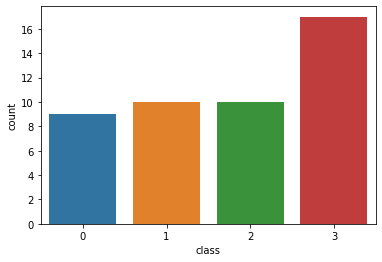

In [134]:
# Plot diagnosos frequencies
sns.countplot ( soybean_data [ 'class' ],label = "Count" ) # boxplot

In [135]:
# Get Columns again
list ( soybean_data.columns )

['date',
 'plant-stand',
 'precip',
 'temp',
 'hail',
 'crop-hist',
 'area-damaged',
 'severity',
 'seed-tmt',
 'germination',
 'leaves',
 'lodging',
 'stem-cankers',
 'canker-lesion',
 'fruiting-bodies',
 'external decay',
 'mycelium',
 'int-discolor',
 'sclerotia',
 'fruit-pods',
 'roots',
 'class']

In [136]:
# Descriptive Statistics: Describe each variable by class (means only)
soybean_data.groupby ( [ 'class' ] )[ 'date','plant-stand','precip','temp','hail','crop-hist','area-damaged','severity','seed-tmt','germination','leaves','lodging','stem-cankers','canker-lesion', 'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods','roots' ].mean()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots
class,,,,,,,,,,,,,,,,,,,,,
0,4.555556,0.0,2.000000,1.000000,0.000000,2.000000,0.333333,1.333333,0.555556,1.222222,...,0.444444,3.000000,0.555556,1.0,1.000000,0.0,0.0,0.0,0.0,0.0
1,4.700000,0.0,0.000000,1.600000,0.600000,1.600000,2.500000,1.000000,0.500000,0.900000,...,0.300000,0.000000,3.000000,0.0,0.000000,0.0,2.0,1.0,0.0,0.0
2,1.300000,0.8,2.000000,0.000000,0.200000,1.500000,1.000000,1.500000,0.400000,1.500000,...,0.200000,1.000000,1.000000,0.0,1.000000,0.5,0.0,0.0,3.0,0.1
3,1.294118,1.0,1.764706,0.588235,0.352941,1.823529,1.117647,1.647059,0.529412,0.941176,...,0.117647,1.529412,2.000000,0.0,0.352941,0.0,0.0,0.0,3.0,1.0


In [137]:
# Descriptive Statistics: Describe each variable by class (means only)
soybean_data.groupby ( [ 'class' ] )[ 'date','plant-stand','precip','temp','hail','crop-hist','area-damaged','severity','seed-tmt','germination','leaves','lodging','stem-cankers','canker-lesion', 'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods','roots' ].describe()

date                                               plant-stand       \
      count      mean       std  min  25%  50%   75%  max       count mean   
class                                                                        
0       9.0  4.555556  1.333333  3.0  3.0  5.0  6.00  6.0         9.0  0.0   
1      10.0  4.700000  1.159502  3.0  4.0  5.0  5.75  6.0        10.0  0.0   
2      10.0  1.300000  1.494434  0.0  0.0  1.0  2.00  4.0        10.0  0.8   
3      17.0  1.294118  1.104802  0.0  0.0  1.0  2.00  3.0        17.0  1.0   

       ... fruit-pods      roots                                          
       ...        75%  max count mean       std  min  25%  50%  75%  max  
class  ...                                                                
0      ...        0.0  0.0   9.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  
1      ...        0.0  0.0  10.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  
2      ...        3.0  3.0  10.0  0.1  0.316228  0.0  0.0  0.0  0.0  1.0  
3      ...        3.0  3.0  17.0  1.0  0.000000  1.0  1.0  1.0  1.0  1.0  

[4 rows x 168 columns]

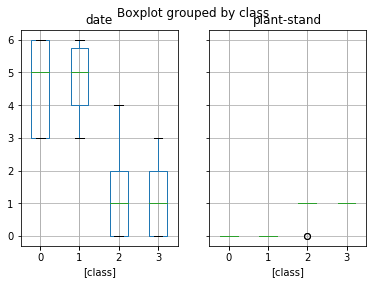

In [138]:
boxplot = soybean_data.boxplot ( column = [ "date", "plant-stand"], by = [ 'class' ] )

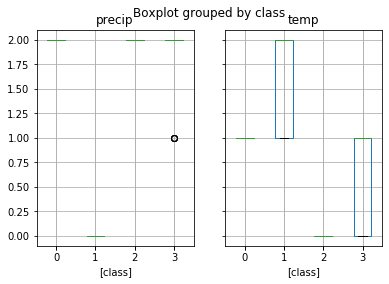

In [139]:
boxplot = soybean_data.boxplot ( column = [ 'precip','temp' ], by = [ 'class' ] )

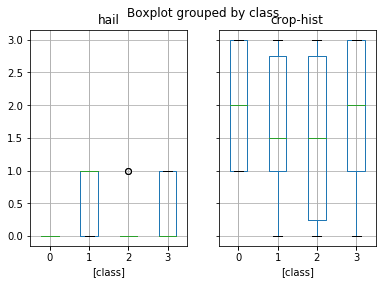

In [140]:
boxplot = soybean_data.boxplot ( column = [ 'hail','crop-hist' ], by = [ 'class' ] )

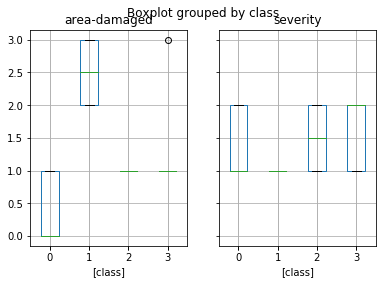

In [141]:
boxplot = soybean_data.boxplot ( column = [ 'area-damaged','severity' ], by = [ 'class' ] )

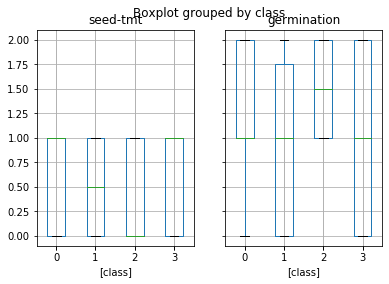

In [142]:
boxplot = soybean_data.boxplot ( column = [ 'seed-tmt','germination' ], by = [ 'class' ] )

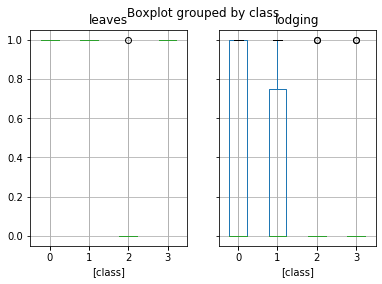

In [143]:
boxplot = soybean_data.boxplot ( column = [ 'leaves','lodging' ], by = [ 'class' ] )

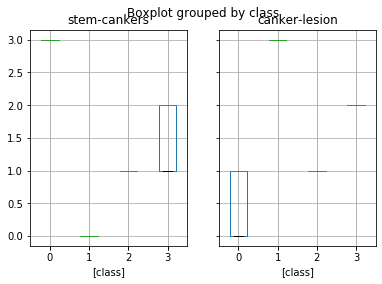

In [144]:
boxplot = soybean_data.boxplot ( column = [ 'stem-cankers','canker-lesion' ], by = [ 'class' ] )

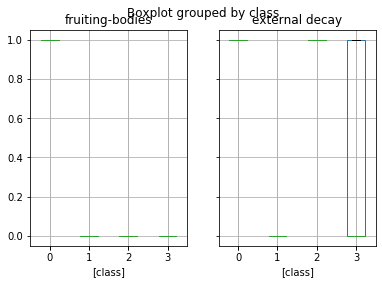

In [145]:
boxplot = soybean_data.boxplot ( column = [ 'fruiting-bodies', 'external decay' ], by = [ 'class' ] )

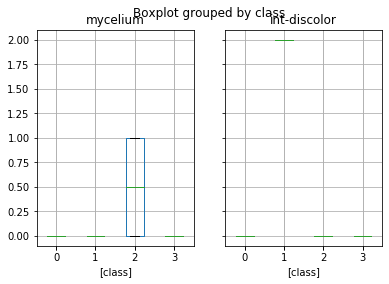

In [146]:
boxplot = soybean_data.boxplot ( column = [ 'mycelium', 'int-discolor' ], by = [ 'class' ] )

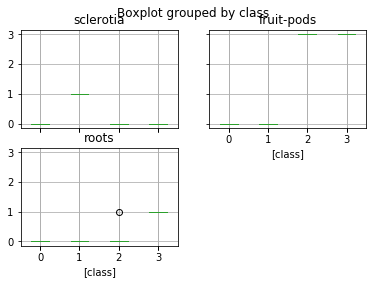

In [147]:
boxplot = soybean_data.boxplot ( column = [ 'sclerotia', 'fruit-pods','roots' ], by = [ 'class' ] )

In [148]:
# Descriptive Statistics: Attribute by Class
# Date by Class
describe_by_category ( soybean_data, "date", "class", transpose = True )

class         0          1          2          3
count  9.000000  10.000000  10.000000  17.000000
mean   4.555556   4.700000   1.300000   1.294118
std    1.333333   1.159502   1.494434   1.104802
min    3.000000   3.000000   0.000000   0.000000
25%    3.000000   4.000000   0.000000   0.000000
50%    5.000000   5.000000   1.000000   1.000000
75%    6.000000   5.750000   2.000000   2.000000
max    6.000000   6.000000   4.000000   3.000000


In [149]:
# Descriptive Statistics: Attribute by Class
# Plant-Stand by Class
describe_by_category ( soybean_data, "plant-stand", "class", transpose = True )

class    0     1          2     3
count  9.0  10.0  10.000000  17.0
mean   0.0   0.0   0.800000   1.0
std    0.0   0.0   0.421637   0.0
min    0.0   0.0   0.000000   1.0
25%    0.0   0.0   1.000000   1.0
50%    0.0   0.0   1.000000   1.0
75%    0.0   0.0   1.000000   1.0
max    0.0   0.0   1.000000   1.0


In [150]:
# Descriptive Statistics: Attribute by Class
# precip by Class
describe_by_category ( soybean_data, "precip", "class", transpose = True )

class    0     1     2          3
count  9.0  10.0  10.0  17.000000
mean   2.0   0.0   2.0   1.764706
std    0.0   0.0   0.0   0.437237
min    2.0   0.0   2.0   1.000000
25%    2.0   0.0   2.0   2.000000
50%    2.0   0.0   2.0   2.000000
75%    2.0   0.0   2.0   2.000000
max    2.0   0.0   2.0   2.000000


In [151]:
# Descriptive Statistics: Attribute by Class
# Temp by Class
describe_by_category ( soybean_data, "temp", "class", transpose = True )

class    0          1     2          3
count  9.0  10.000000  10.0  17.000000
mean   1.0   1.600000   0.0   0.588235
std    0.0   0.516398   0.0   0.507300
min    1.0   1.000000   0.0   0.000000
25%    1.0   1.000000   0.0   0.000000
50%    1.0   2.000000   0.0   1.000000
75%    1.0   2.000000   0.0   1.000000
max    1.0   2.000000   0.0   1.000000


In [152]:
# Descriptive Statistics: Attribute by Class
# Hail by Class
describe_by_category ( soybean_data, "hail", "class", transpose = True )

class    0          1          2          3
count  9.0  10.000000  10.000000  17.000000
mean   0.0   0.600000   0.200000   0.352941
std    0.0   0.516398   0.421637   0.492592
min    0.0   0.000000   0.000000   0.000000
25%    0.0   0.000000   0.000000   0.000000
50%    0.0   1.000000   0.000000   0.000000
75%    0.0   1.000000   0.000000   1.000000
max    0.0   1.000000   1.000000   1.000000


In [153]:
# Descriptive Statistics: Attribute by Class
# Crop-Hist by Class
describe_by_category ( soybean_data, "crop-hist", "class", transpose = True )

class         0          1          2          3
count  9.000000  10.000000  10.000000  17.000000
mean   2.000000   1.600000   1.500000   1.823529
std    0.866025   1.173788   1.269296   1.074436
min    1.000000   0.000000   0.000000   0.000000
25%    1.000000   1.000000   0.250000   1.000000
50%    2.000000   1.500000   1.500000   2.000000
75%    3.000000   2.750000   2.750000   3.000000
max    3.000000   3.000000   3.000000   3.000000


In [154]:
# Descriptive Statistics: Attribute by Class
# Area-Damaged by Class
describe_by_category ( soybean_data, "area-damaged", "class", transpose = True )

class         0          1     2          3
count  9.000000  10.000000  10.0  17.000000
mean   0.333333   2.500000   1.0   1.117647
std    0.500000   0.527046   0.0   0.485071
min    0.000000   2.000000   1.0   1.000000
25%    0.000000   2.000000   1.0   1.000000
50%    0.000000   2.500000   1.0   1.000000
75%    1.000000   3.000000   1.0   1.000000
max    1.000000   3.000000   1.0   3.000000


In [155]:
# Descriptive Statistics: Attribute by Class
# Severity by Class
describe_by_category ( soybean_data, "severity", "class", transpose = True )

class         0     1          2          3
count  9.000000  10.0  10.000000  17.000000
mean   1.333333   1.0   1.500000   1.647059
std    0.500000   0.0   0.527046   0.492592
min    1.000000   1.0   1.000000   1.000000
25%    1.000000   1.0   1.000000   1.000000
50%    1.000000   1.0   1.500000   2.000000
75%    2.000000   1.0   2.000000   2.000000
max    2.000000   1.0   2.000000   2.000000


In [156]:
# Descriptive Statistics: Attribute by Class
# Seed-tmt by Class
describe_by_category ( soybean_data, "seed-tmt", "class", transpose = True )

class         0          1          2          3
count  9.000000  10.000000  10.000000  17.000000
mean   0.555556   0.500000   0.400000   0.529412
std    0.527046   0.527046   0.516398   0.514496
min    0.000000   0.000000   0.000000   0.000000
25%    0.000000   0.000000   0.000000   0.000000
50%    1.000000   0.500000   0.000000   1.000000
75%    1.000000   1.000000   1.000000   1.000000
max    1.000000   1.000000   1.000000   1.000000


In [157]:
# Descriptive Statistics: Attribute by Class
# Germination by Class
describe_by_category ( soybean_data, "germination", "class", transpose = True )

class         0          1          2          3
count  9.000000  10.000000  10.000000  17.000000
mean   1.222222   0.900000   1.500000   0.941176
std    0.833333   0.875595   0.527046   0.899346
min    0.000000   0.000000   1.000000   0.000000
25%    1.000000   0.000000   1.000000   0.000000
50%    1.000000   1.000000   1.500000   1.000000
75%    2.000000   1.750000   2.000000   2.000000
max    2.000000   2.000000   2.000000   2.000000


In [158]:
# Descriptive Statistics: Attribute by Class
# Leaves by Class
describe_by_category ( soybean_data, "leaves", "class", transpose = True )

class    0     1          2     3
count  9.0  10.0  10.000000  17.0
mean   1.0   1.0   0.100000   1.0
std    0.0   0.0   0.316228   0.0
min    1.0   1.0   0.000000   1.0
25%    1.0   1.0   0.000000   1.0
50%    1.0   1.0   0.000000   1.0
75%    1.0   1.0   0.000000   1.0
max    1.0   1.0   1.000000   1.0


In [159]:
# Descriptive Statistics: Attribute by Class
# Lodging by Class
describe_by_category ( soybean_data, "lodging", "class", transpose = True )

class         0          1          2          3
count  9.000000  10.000000  10.000000  17.000000
mean   0.444444   0.300000   0.200000   0.117647
std    0.527046   0.483046   0.421637   0.332106
min    0.000000   0.000000   0.000000   0.000000
25%    0.000000   0.000000   0.000000   0.000000
50%    0.000000   0.000000   0.000000   0.000000
75%    1.000000   0.750000   0.000000   0.000000
max    1.000000   1.000000   1.000000   1.000000


In [160]:
# Descriptive Statistics: Attribute by Class
# Stem-Cankers by Class
describe_by_category ( soybean_data, "stem-cankers", "class", transpose = True )

class    0     1     2          3
count  9.0  10.0  10.0  17.000000
mean   3.0   0.0   1.0   1.529412
std    0.0   0.0   0.0   0.514496
min    3.0   0.0   1.0   1.000000
25%    3.0   0.0   1.0   1.000000
50%    3.0   0.0   1.0   2.000000
75%    3.0   0.0   1.0   2.000000
max    3.0   0.0   1.0   2.000000


In [161]:
# Descriptive Statistics: Attribute by Class
# Canker-lesion by Class
describe_by_category ( soybean_data, "canker-lesion", "class", transpose = True )

class         0     1     2     3
count  9.000000  10.0  10.0  17.0
mean   0.555556   3.0   1.0   2.0
std    0.527046   0.0   0.0   0.0
min    0.000000   3.0   1.0   2.0
25%    0.000000   3.0   1.0   2.0
50%    1.000000   3.0   1.0   2.0
75%    1.000000   3.0   1.0   2.0
max    1.000000   3.0   1.0   2.0


In [162]:
# Descriptive Statistics: Attribute by Class
# Fruiting-bodies by Class
describe_by_category ( soybean_data, "fruiting-bodies", "class", transpose = True )

class    0     1     2     3
count  9.0  10.0  10.0  17.0
mean   1.0   0.0   0.0   0.0
std    0.0   0.0   0.0   0.0
min    1.0   0.0   0.0   0.0
25%    1.0   0.0   0.0   0.0
50%    1.0   0.0   0.0   0.0
75%    1.0   0.0   0.0   0.0
max    1.0   0.0   0.0   0.0


In [163]:
# Descriptive Statistics: Attribute by Class
# External decay by Class
describe_by_category ( soybean_data, "external decay", "class", transpose = True )

class    0     1     2          3
count  9.0  10.0  10.0  17.000000
mean   1.0   0.0   1.0   0.352941
std    0.0   0.0   0.0   0.492592
min    1.0   0.0   1.0   0.000000
25%    1.0   0.0   1.0   0.000000
50%    1.0   0.0   1.0   0.000000
75%    1.0   0.0   1.0   1.000000
max    1.0   0.0   1.0   1.000000


In [164]:
# Descriptive Statistics: Attribute by Class
# Mycelium by Class
describe_by_category ( soybean_data, "mycelium", "class", transpose = True )

class    0     1          2     3
count  9.0  10.0  10.000000  17.0
mean   0.0   0.0   0.500000   0.0
std    0.0   0.0   0.527046   0.0
min    0.0   0.0   0.000000   0.0
25%    0.0   0.0   0.000000   0.0
50%    0.0   0.0   0.500000   0.0
75%    0.0   0.0   1.000000   0.0
max    0.0   0.0   1.000000   0.0


In [165]:
# Descriptive Statistics: Attribute by Class
# int-discolor by Class
describe_by_category ( soybean_data, "int-discolor", "class", transpose = True )

class    0     1     2     3
count  9.0  10.0  10.0  17.0
mean   0.0   2.0   0.0   0.0
std    0.0   0.0   0.0   0.0
min    0.0   2.0   0.0   0.0
25%    0.0   2.0   0.0   0.0
50%    0.0   2.0   0.0   0.0
75%    0.0   2.0   0.0   0.0
max    0.0   2.0   0.0   0.0


In [166]:
# Descriptive Statistics: Attribute by Class
# Sclerotia by Class
describe_by_category ( soybean_data, "sclerotia", "class", transpose = True )

class    0     1     2     3
count  9.0  10.0  10.0  17.0
mean   0.0   1.0   0.0   0.0
std    0.0   0.0   0.0   0.0
min    0.0   1.0   0.0   0.0
25%    0.0   1.0   0.0   0.0
50%    0.0   1.0   0.0   0.0
75%    0.0   1.0   0.0   0.0
max    0.0   1.0   0.0   0.0


In [167]:
# Descriptive Statistics: Attribute by Class
# Fruit-Pods by Class
describe_by_category ( soybean_data, "fruit-pods", "class", transpose = True )

class    0     1     2     3
count  9.0  10.0  10.0  17.0
mean   0.0   0.0   3.0   3.0
std    0.0   0.0   0.0   0.0
min    0.0   0.0   3.0   3.0
25%    0.0   0.0   3.0   3.0
50%    0.0   0.0   3.0   3.0
75%    0.0   0.0   3.0   3.0
max    0.0   0.0   3.0   3.0


In [168]:
# Descriptive Statistics: Attribute by Class
# Roots by Class
describe_by_category ( soybean_data, "roots", "class", transpose = True )

class    0     1          2     3
count  9.0  10.0  10.000000  17.0
mean   0.0   0.0   0.100000   1.0
std    0.0   0.0   0.316228   0.0
min    0.0   0.0   0.000000   1.0
25%    0.0   0.0   0.000000   1.0
50%    0.0   0.0   0.000000   1.0
75%    0.0   0.0   0.000000   1.0
max    0.0   0.0   1.000000   1.0


## Backpropagation Classification Experiments: Soybean Data

### Assign Feature Matrix & Target Vector


In [169]:
# X = Feature Matrix/Input Matrix
# y = target array/ class label
feature_matrix, target_vector = (
    pd.get_dummies(
        soybean_bool.drop ( "class", axis = 1 ),
        columns = soybean_bool.drop ( "class", axis = 1 ).columns,
        drop_first = True,
    ).values,
    soybean_bool [ "class" ].values,
)

### Run Backpropagation 
### Stratified Cross-Fold Validation

In [170]:
# Experiment: Soybean Data

# Log Experiment: Running Backpropagation Classification Experiment on Soybean Data
logger.info ( "Running Soybean Backpropagation Classification Experiment" )

# Random Seed
np.random.seed ( 8032020 ) #Today's date

# Run Soybean Experiment
soybean_results = run_classification_experiment (
    feature_matrix,
    target_vector = target_vector,
    learning_rate_choices = np.linspace ( 0.003, 0.005, 3 ),
    hidden_layer_choices = list ( range ( 5, 11, 2 ) ),
    filename = "soybean_prediction_results.csv",
)

# Log Soybean Results
logger.info ( f"Soybean Results: { dicttoolz.valmap ( np.mean, soybean_results [ 'accuracy' ] ) }"
           )

INFO:__main__:Running Soybean Backpropagation Classification Experiment
INFO:__main__:CV Iteration: 1
INFO:__main__:Standardizing data
INFO:__main__:Finding learning rate for H0
/Users/riccacallis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
INFO:__main__:Results: {'lr': 0.005}
INFO:__main__:Finding topology and learning rate for H1
INFO:__main__:Results: {'h1': 9, 'lr': 0.005}
INFO:__main__:Finding topology and learning rate for H2
INFO:__main__:Results: {'h1': 5, 'h2': 5, 'lr': 0.005}
INFO:__main__:Creating prediction output files: soybean_prediction_results.csv
INFO:__main__:CV Iteration: 2
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 3
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 4
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 5
INFO:__main__:Standardizing data
INFO:__main__:Soybean Results: {'h0': 0.8877777777777778, 'h1': 0.3683333333333333, 'h2': 0.3683333333333333, 'bas

# House Votes Data Set
## Extract, Transform, Load: House Votes Data

Data obtained from https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

### Attribute Information: 17 Attributes (d)

1. Class Name: 2 (democrat, republican) 
2. handicapped-infants: 2 (y,n) 
3. water-project-cost-sharing: 2 (y,n) 
4. adoption-of-the-budget-resolution: 2 (y,n) 
5. physician-fee-freeze: 2 (y,n) 
6. el-salvador-aid: 2 (y,n) 
7. religious-groups-in-schools: 2 (y,n) 
8. anti-satellite-test-ban: 2 (y,n) 
9. aid-to-nicaraguan-contras: 2 (y,n) 
10. mx-missile: 2 (y,n) 
11. immigration: 2 (y,n) 
12. synfuels-corporation-cutback: 2 (y,n) 
13. education-spending: 2 (y,n) 
14. superfund-right-to-sue: 2 (y,n) 
15. crime: 2 (y,n) 
16. duty-free-exports: 2 (y,n) 
17. export-administration-act-south-africa: 2 (y,n)

### One Class Label
18. Instance Class

In [171]:
# Log ETL: House Vote Data
logger.info ( "ETL: Vote Data Set" )

# Read House Vote Data
house_votes_data = (
    pd.read_csv(
        "house-votes-84.data.csv",
        header = None,
        # Assign column labels
        names = [
            "class",
            "handicapped-infants",
            "water-project-cost-sharing",
            "adoption-of-the-budget-resolution",
            "physician-fee-freeze",
            "el-salvador-aid",
            "religious-groups-in-schools",
            "anti-satellite-test-ban",
            "aid-to-nicaraguan-contras",
            "mx-missile",
            "immigration",
            "synfuels-corporation-cutback",
            "education-spending",
            "superfund-right-to-sue",
            "crime",
            "duty-free-exports",
            "export-administration-act-south-africa",
        ],
    )
    .replace ( "?", np.NaN )
    .dropna ( axis = 0, how = 'any')
    .replace ( "y", 1 )
    .replace ( "n", 0 )
)

INFO:__main__:ETL: Vote Data Set


In [172]:
# Confirm column names
list ( house_votes_data.columns )

['class',
 'handicapped-infants',
 'water-project-cost-sharing',
 'adoption-of-the-budget-resolution',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-nicaraguan-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation-cutback',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'duty-free-exports',
 'export-administration-act-south-africa']

In [173]:
# Verify whether any values are null
house_votes_data.isnull().values.any()

False

In [174]:
# Again
house_votes_data.isna().any()

class                                     False
handicapped-infants                       False
water-project-cost-sharing                False
adoption-of-the-budget-resolution         False
physician-fee-freeze                      False
el-salvador-aid                           False
religious-groups-in-schools               False
anti-satellite-test-ban                   False
aid-to-nicaraguan-contras                 False
mx-missile                                False
immigration                               False
synfuels-corporation-cutback              False
education-spending                        False
superfund-right-to-sue                    False
crime                                     False
duty-free-exports                         False
export-administration-act-south-africa    False
dtype: bool

**Notes**

We see no NaN instances in any of the attributes or class columns

In [175]:
# Assign class as category
house_votes_data[ "class" ].astype ( "category" ).cat.codes.values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int8)

In [176]:
# Confirm data was properly read by examining data frame
house_votes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
class                                     232 non-null object
handicapped-infants                       232 non-null int64
water-project-cost-sharing                232 non-null int64
adoption-of-the-budget-resolution         232 non-null int64
physician-fee-freeze                      232 non-null int64
el-salvador-aid                           232 non-null int64
religious-groups-in-schools               232 non-null int64
anti-satellite-test-ban                   232 non-null int64
aid-to-nicaraguan-contras                 232 non-null int64
mx-missile                                232 non-null int64
immigration                               232 non-null int64
synfuels-corporation-cutback              232 non-null int64
education-spending                        232 non-null int64
superfund-right-to-sue                    232 non-null int64
crime                                   

**Notes**

We see there are 17 columns (16 attributes; 1 class), 232 entries total and each column has 232 instances (so no missing data). We see that all columns are listed as objects.

In [177]:
# Look at first few rows of dataframe
house_votes_data.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [178]:
# Map 'republican': 1, 'democrat': 0
house_votes_data.replace ( [ 'republican', 'democrat' ], [ 1, 0 ], inplace = True )
house_votes_data.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [179]:
# Log ETL
logger.info ( f"ETL, Dataframe Info: { house_votes_data.head() }" )

INFO:__main__:ETL, Dataframe Info:     class  handicapped-infants  water-project-cost-sharing  \
5       0                    0                           1   
8       1                    0                           1   
19      0                    1                           1   
23      0                    1                           1   
25      0                    1                           0   

    adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
5                                   1                     0                1   
8                                   0                     1                1   
19                                  1                     0                0   
23                                  1                     0                0   
25                                  1                     0                0   

    religious-groups-in-schools  anti-satellite-test-ban  \
5                             1                    

In [180]:
# Make all instances at integer type
house_votes_data.astype ( "int" )

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1
426,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
427,1,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1
430,1,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1


In [181]:
# Confirm
house_votes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
class                                     232 non-null int64
handicapped-infants                       232 non-null int64
water-project-cost-sharing                232 non-null int64
adoption-of-the-budget-resolution         232 non-null int64
physician-fee-freeze                      232 non-null int64
el-salvador-aid                           232 non-null int64
religious-groups-in-schools               232 non-null int64
anti-satellite-test-ban                   232 non-null int64
aid-to-nicaraguan-contras                 232 non-null int64
mx-missile                                232 non-null int64
immigration                               232 non-null int64
synfuels-corporation-cutback              232 non-null int64
education-spending                        232 non-null int64
superfund-right-to-sue                    232 non-null int64
crime                                    

In [182]:
# One-hot encoding
house_votes_bool = pd.get_dummies (
    house_votes_data,
    dummy_na = True,
    drop_first = True,
    columns = list ( filter ( lambda c: c != "class", house_votes_data.columns ) ),
)

In [183]:
# Confirm
house_votes_bool.head()

,class,handicapped-infants_1.0,handicapped-infants_nan,water-project-cost-sharing_1.0,water-project-cost-sharing_nan,adoption-of-the-budget-resolution_1.0,adoption-of-the-budget-resolution_nan,physician-fee-freeze_1.0,physician-fee-freeze_nan,el-salvador-aid_1.0,...,education-spending_1.0,education-spending_nan,superfund-right-to-sue_1.0,superfund-right-to-sue_nan,crime_1.0,crime_nan,duty-free-exports_1.0,duty-free-exports_nan,export-administration-act-south-africa_1.0,export-administration-act-south-africa_nan
5,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
8,1,0,0,1,0,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
19,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
23,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
25,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [184]:
# Log ETL
logger.info ( f"ETL, Dataframe Info, One-Hot Encoding: { house_votes_bool.head() }" )

INFO:__main__:ETL, Dataframe Info, One-Hot Encoding:     class  handicapped-infants_1.0  handicapped-infants_nan  \
5       0                        0                        0   
8       1                        0                        0   
19      0                        1                        0   
23      0                        1                        0   
25      0                        1                        0   

    water-project-cost-sharing_1.0  water-project-cost-sharing_nan  \
5                                1                               0   
8                                1                               0   
19                               1                               0   
23                               1                               0   
25                               0                               0   

    adoption-of-the-budget-resolution_1.0  \
5                                       1   
8                                       0   
19          

## (Brief) Exploratory Data Analysis: House Votes Data

### Single Variable

Let's look at the summary statistics & Tukey's 5

In [185]:
# Log EDA: House Votes Data
logger.info ( "EDA: House Votes Data Set" )

# Descriptive Statistics
house_votes_data.describe()

INFO:__main__:EDA: House Votes Data Set


,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.465517,0.413793,0.461207,0.530172,0.487069,0.551724,0.642241,0.534483,0.512931,0.487069,0.551724,0.344828,0.465517,0.547414,0.642241,0.370690,0.814655
std,0.499888,0.493577,0.499571,0.500168,0.500913,0.498393,0.480377,0.499888,0.500913,0.500913,0.498393,0.476340,0.499888,0.498823,0.480377,0.484034,0.389417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Notes**

Total number of observations: 232

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$


In [186]:
# Log Descriptives
logger.info ( f"Descriptive Statistics: { house_votes_data.describe() }" )

INFO:__main__:Descriptive Statistics:             class  handicapped-infants  water-project-cost-sharing  \
count  232.000000           232.000000                  232.000000   
mean     0.465517             0.413793                    0.461207   
std      0.499888             0.493577                    0.499571   
min      0.000000             0.000000                    0.000000   
25%      0.000000             0.000000                    0.000000   
50%      0.000000             0.000000                    0.000000   
75%      1.000000             1.000000                    1.000000   
max      1.000000             1.000000                    1.000000   

       adoption-of-the-budget-resolution  physician-fee-freeze  \
count                         232.000000            232.000000   
mean                            0.530172              0.487069   
std                             0.500168              0.500913   
min                             0.000000              0.000000   
2

## (Brief) Exploratory Data Analysis: House Votes Data

### Pair-Wise: Attribute by Class

In [187]:
# Frequency of diagnoses classifications
house_votes_data [ 'class' ].value_counts() # raw counts

0    124
1    108
Name: class, dtype: int64

**Notes*

We observe 124 Republicans and 108 Democrats

In [188]:
#Log Pair-Wise Attribute by Class
logger.info ( f"Pair-Wise Attribute by Class: { house_votes_data [ 'class' ].value_counts() }" )

INFO:__main__:Pair-Wise Attribute by Class: 0    124
1    108
Name: class, dtype: int64


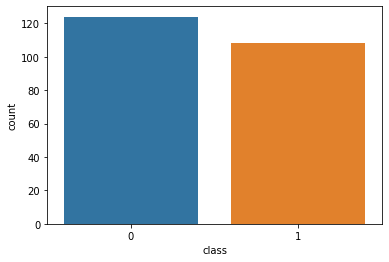

In [189]:
# Plot diagnosos frequencies
sns.countplot ( house_votes_data [ 'class' ],label = "Count" ) # boxplot

In [190]:
# Descriptive Statistics: Count by Class
house_votes_data.groupby ( [ 'class' ] )[ "handicapped-infants","water-project-cost-sharing","adoption-of-the-budget-resolution","physician-fee-freeze","el-salvador-aid","religious-groups-in-schools", "anti-satellite-test-ban", "aid-to-nicaraguan-contras", "mx-missile", "immigration", "synfuels-corporation-cutback", "education-spending", "superfund-right-to-sue", "crime", "duty-free-exports", "export-administration-act-south-africa",].count()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
class,,,,,,,,,,,,,,,,
0,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124
1,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108


## Backpropagation Classification Experiments: House Votes Data

### Assign Feature Matrix & Target Vector


In [191]:
# X = feature matrix; input matrix; attributes
# y = target array; class label

feature_matrix, target_vector = (
    house_votes_bool.drop ( [ "class" ], axis = 1 ).values,
    house_votes_bool [ "class" ].values,
)

### Run Backpropagation
### Stratified Cross-Fold Validation

In [192]:
# Experiment: House Votes Data

# Log Experiment: Running Backpropagation Classification Experiment on House Votes Data
logger.info ( "Running House Votes Backpropagation Classification Experiment" )

# Random Seed
np.random.seed ( 8032020 ) #Today's date

# Run House Votes Experiment
house_votes_results = run_classification_experiment (
    feature_matrix = feature_matrix,
    target_vector = target_vector,
    learning_rate_choices = list ( np.linspace ( 0.001, 0.01, 10 ) ),
    hidden_layer_choices = [ 4, 7, 9 ],
    n_iterations = 1500,
    conv_tol = 0.01,
    filename = "house_votes_results.csv",
)

logger.info ( f"House Results: { dicttoolz.valmap ( np.mean, house_votes_results [ 'accuracy' ] ) }"
           )

INFO:__main__:Running House Votes Backpropagation Classification Experiment
INFO:__main__:CV Iteration: 1
INFO:__main__:Standardizing data
/Users/riccacallis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:375: RuntimeWarning: invalid value encountered in true_divide
INFO:__main__:Finding learning rate for H0
/Users/riccacallis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
INFO:__main__:Results: {'lr': 0.006}
INFO:__main__:Finding topology and learning rate for H1
INFO:__main__:Results: {'h1': 7, 'lr': 0.01}
INFO:__main__:Finding topology and learning rate for H2
INFO:__main__:Results: {'h1': 4, 'h2': 4, 'lr': 0.01}
INFO:__main__:Creating prediction output files: house_votes_results.csv
INFO:__main__:CV Iteration: 2
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 3
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 4
INFO:__main__:Standardizing data
INFO:__main__:CV Iteration: 5
INFO:__main